# Youtube Analysis for Kincir Channel Study Case

In this project, my company want to open new channel discussing about movies and e-sport. Here I analyze the Youtube data from similar channel using Youtube Data API and trying to figure out if there are any insights, patterns, and recommendation that could be implemented on our newly published channel.

In [1]:
import csv
import pandas as pd

In [7]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [10]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Kincir Cinema

Kincir cinema is a youtube channel from Kincir that specialize in discussing movie critics and reviews. This channel has more than hundreads video and count as the most reliable movie reviews and critics by some movie experts

In [71]:
dfCinema = pd.read_csv("kincirCinema.tab",delimiter="\t")

In [84]:
new1 = dfCinema['publishedAtSQL'].str.split(' ', n = 1, expand = True)
dfCinema['Date Published'] = new1[0]
dfCinema['Hour Published'] = new1[1]
dfCinema['Date Published'] =  pd.to_datetime(dfCinema['Date Published'])
dfCinema['day_of_week'] = dfCinema['Date Published'].dt.weekday_name

In [129]:
dfCinema['hour'] = pd.to_datetime(dfCinema['Hour Published'], format='%H:%M:%S').dt.hour

In [89]:
dfCinema.groupby('videoCategoryLabel').videoCategoryLabel.count()

videoCategoryLabel
Film & Animation    493
People & Blogs        1
Name: videoCategoryLabel, dtype: int64

In [100]:
np.sum(dfCinema.viewCount)

13432066

In [101]:
np.mean(dfPlayroom.viewCount)

16091.154605263158

# Kincir Playroom

Kincir Playroom is a channel from Kincir which focus on discussing gaming and e-sport industry. This channel has more than 600 videos about gaming.

In [73]:
dfPlayroom = pd.read_csv("kincirPlayroom.tab",delimiter="\t")

In [85]:
new2 = dfPlayroom['publishedAtSQL'].str.split(' ', n = 1, expand = True)
dfPlayroom['Date Published'] = new2[0]
dfPlayroom['Hour Published'] = new2[1]
dfPlayroom['Date Published'] =  pd.to_datetime(dfPlayroom['Date Published'])
dfPlayroom['day_of_week'] = dfPlayroom['Date Published'].dt.weekday_name

In [130]:
dfPlayroom['hour'] = pd.to_datetime(dfPlayroom['Hour Published'], format='%H:%M:%S').dt.hour

In [88]:
dfPlayroom.groupby('videoCategoryLabel').videoCategoryLabel.count()

videoCategoryLabel
Gaming    608
Name: videoCategoryLabel, dtype: int64

In [95]:
np.sum(dfPlayroom.viewCount)

9783422

In [96]:
np.mean(dfPlayroom.viewCount)

16091.154605263158

# Kincir.com

Kincir.com mainly discussing about general contents such as lifestyle, gaming, relationship, movie, trends, and many more. The reason to analyze this channel is to gain more information about gaming and movie topics which probably covered by this channel

In [75]:
dfKincir = pd.read_csv("kincircom.tab",delimiter="\t")

In [87]:
new3 = dfKincir['publishedAtSQL'].str.split(' ', n = 1, expand = True)
dfKincir['Date Published'] = new3[0]
dfKincir['Hour Published'] = new3[1]
dfKincir['Date Published'] = pd.to_datetime(dfKincir['Date Published'])
dfKincir['day_of_week'] = dfPlayroom['Date Published'].dt.weekday_name

In [131]:
dfKincir['hour'] = pd.to_datetime(dfKincir['Hour Published'], format='%H:%M:%S').dt.hour

In [86]:
dfKincir.groupby('videoCategoryLabel').videoCategoryLabel.count()

videoCategoryLabel
Entertainment      573
Gaming              13
Music              147
News & Politics     22
People & Blogs     101
Travel & Events      4
Name: videoCategoryLabel, dtype: int64

In [97]:
np.sum(dfKincir.viewCount)

13405512

In [98]:
np.mean(dfKincir.viewCount)

15587.80465116279

## Creating Combined Dataframe 

Combining all data from cinema, playroom, and kincir.com to gain a big picture about all the data

In [12]:
result = pd.concat([dfCinema, dfPlayroom, dfKincir])

In [15]:
new = result['publishedAtSQL'].str.split(' ', n = 1, expand = True)

In [16]:
result['Date Published'] = new[0]

In [17]:
result['Hour Published'] = new[1]

In [18]:
result['Date Published'] =  pd.to_datetime(result['Date Published'])

In [19]:
result['day_of_week'] = result['Date Published'].dt.weekday_name

In [122]:
result

,position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,...,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,Date Published,Hour Published,day_of_week,hour
0,1,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,X75mxxDWWz8,2019-02-07T14:17:02.000Z,2019-02-07 14:17:02,What's On: Rush Hour 4 Sudah Lampu Hijau,Subscribe to Kincir.com on YouTube: http://bit...,1,Film & Animation,...,1.00,568,34,0,0,10,2019-02-07,14:17:02,Thursday,14
1,2,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,slerGKxJ6cE,2019-02-06T13:52:09.000Z,2019-02-06 13:52:09,What's On: Film Mortal Kombat Siap Digarap Lagi,Subscribe to Kincir.com on YouTube: http://bit...,1,Film & Animation,...,1.00,974,50,0,0,16,2019-02-06,13:52:09,Wednesday,13
2,3,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,Xefbf2nfDcI,2019-02-06T13:02:21.000Z,2019-02-06 13:02:21,Hotlist: 5 Transformasi Dragon Ball Terkeren S...,Subscribe to Kincir.com on YouTube: http://bit...,1,Film & Animation,...,1.00,4737,142,3,0,93,2019-02-06,13:02:21,Wednesday,13
3,4,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,XXs8rGvCgE4,2019-02-05T06:15:00.000Z,2019-02-05 06:15:00,"What's On Film: Fast & Furious Spin Off, Spin ...",Subscribe to Kincir.com on YouTube: http://bit...,1,Film & Animation,...,1.00,931,44,0,0,13,2019-02-05,06:15:00,Tuesday,6
4,5,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,peWOM0JrQWM,2019-02-04T13:28:05.000Z,2019-02-04 13:28:05,What's On: Trailer Avengers: Endgame Tease Per...,Subscribe to Kincir.com on YouTube: http://bit...,1,Film & Animation,...,1.00,2231,105,2,0,12,2019-02-04,13:28:05,Monday,13
5,6,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,pwTRbDV4FRM,2019-02-03T08:00:04.000Z,2019-02-03 08:00:04,What's On: Warner Bros Siapkan Film Action Fig...,Subscribe to Kincir.com on YouTube: http://bit...,1,Film & Animation,...,1.00,626,35,1,0,5,2019-02-03,08:00:04,Sunday,8
6,7,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,m3aic_PaQd0,2019-02-02T08:00:05.000Z,2019-02-02 08:00:05,What's On: Kedatangan James Gunn Dan Kepergian...,Subscribe to Kincir.com on YouTube: http://bit...,1,Film & Animation,...,1.00,1375,47,1,0,26,2019-02-02,08:00:05,Saturday,8
7,8,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,GSDeo9JfJQY,2019-02-01T11:21:18.000Z,2019-02-01 11:21:18,What's On: Naskah Si Buta Dari Gua Hantu: Mata...,Subscribe to Kincir.com on YouTube: http://bit...,1,Film & Animation,...,1.00,1513,79,1,0,15,2019-02-01,11:21:18,Friday,11
8,9,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,OXY-WDhL1kY,2019-02-01T11:19:08.000Z,2019-02-01 11:19:08,Breakdown: Tabu: Mengusik Gerbang Iblis (2019)...,Subscribe to Kincir.com on YouTube: http://bit...,1,Film & Animation,...,1.00,2003,86,2,0,19,2019-02-01,11:19:08,Friday,11
9,10,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,DiVKDzofpRM,2019-01-31T11:44:33.000Z,2019-01-31 11:44:33,"Breakdown: Terlalu Tampan (2019) Ari Irham, Ra...",Subscribe to Kincir.com on YouTube: http://bit...,1,Film & Animation,...,1.00,82630,1201,42,0,231,2019-01-31,11:44:33,Thursday,11


SORTING VIDEO BY ITS VIEWS

In [143]:
result.sort_values(by=['viewCount'], ascending = False)

,position,channelId,channelTitle,videoId,publishedAt,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,...,licensedContent,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,Date Published,Hour Published,day_of_week,hour
824,825,UCMy_XZ5CQZKIWJBR13gY4FA,Kincir.com,Ga5tkM6jK4c,2014-04-15T10:41:16.000Z,2014-04-15 10:41:16,Teenebelle - Tersenyumlah (Panggung Kincir),"Kamis (10/4) kemarin, Teenebelle yang masih be...",10,Music,...,nan,4413096,29487,2469,0,2907,2014-04-15,10:41:16,Tuesday,10
716,717,UCMy_XZ5CQZKIWJBR13gY4FA,Kincir.com,XtQK3Y0yLFQ,2014-10-14T04:00:01.000Z,2014-10-14 04:00:01,Cherrybelle Feat Adit Sopo Jarwo Animasi Serie...,Setelah berkeliling kantor MD Animasi dan memb...,10,Music,...,nan,956950,4183,339,0,294,2014-10-14,04:00:01,Tuesday,4
406,407,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,mbJR6a9sTzg,2018-04-09T11:35:42.000Z,2018-04-09 11:35:42,Hotlist - 7 Superhero Indonesia Yang Layak Mas...,Check out more videos from Kincir.com here htt...,1,Film & Animation,...,1.00,608968,127,11,0,51,2018-04-09,11:35:42,Monday,11
288,289,UCMy_XZ5CQZKIWJBR13gY4FA,Kincir.com,5jRZpTUvtwg,2017-04-07T05:09:46.000Z,2017-04-07 05:09:46,"Fakta Ngeri di Balik Film ""Danur""","Siapa yang sudah nonton film ""Danur""? Wih, kat...",24,Entertainment,...,1.00,515590,855,119,0,44,2017-04-07,05:09:46,Friday,5
803,804,UCMy_XZ5CQZKIWJBR13gY4FA,Kincir.com,pr_NMfwTvJ0,2014-05-28T02:14:49.000Z,2014-05-28 02:14:49,Maureen Daryanani - Peserta #AudisiTeenebelle,http://audisiteenebelle.kincir.com/,10,Music,...,1.00,448051,2478,235,0,130,2014-05-28,02:14:49,Wednesday,2
776,777,UCMy_XZ5CQZKIWJBR13gY4FA,Kincir.com,GUL-Cd1mmZ4,2014-06-13T08:31:33.000Z,2014-06-13 08:31:33,Ngintip Latihan Dance Teenebelle,http://www.kincir.com/teenebelle,10,Music,...,nan,396608,1867,173,0,183,2014-06-13,08:31:33,Friday,8
815,816,UCMy_XZ5CQZKIWJBR13gY4FA,Kincir.com,c9NEo1ZXhAs,2014-05-21T08:19:24.000Z,2014-05-21 08:19:24,Cherrybelle saat #AudisiTeenebelle Offline di ...,http://www.kincir.com/cherrybelle,10,Music,...,nan,387698,2979,169,0,222,2014-05-21,08:19:24,Wednesday,8
9,10,UC9rn6meL2nACCep1XodJQ1g,KINCIR - Playroom,DtWfpzW5fUU,2019-01-29T15:29:00.000Z,2019-01-29 15:29:00,Special Report: Opening Piala Presiden Esports...,Subscribe to Kincir.com on YouTube: http://bit...,20,Gaming,...,1.00,368463,54,1,0,32,2019-01-29,15:29:00,Tuesday,15
294,295,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,sl18zK4gwH0,2018-07-20T09:55:05.000Z,2018-07-20 09:55:05,Hotlist: 7 Karakter Anime yang Bisa Jadi Rekan...,Check out more videos from Kincir.com here htt...,1,Film & Animation,...,1.00,356532,83,2,0,42,2018-07-20,09:55:05,Friday,9
337,338,UCVCbLkBJ-OhZ-4qsSaEdN8w,KINCIR - Cinema Club,eYpVTDAN2Dk,2018-06-07T07:10:46.000Z,2018-06-07 07:10:46,Hot List: 7 Cewek Bondol Anime Tercantik,Check out more videos from Kincir.com here htt...,1,Film & Animation,...,nan,345462,181,10,0,93,2018-06-07,07:10:46,Thursday,7


In [114]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1962 entries, 0 to 859
Data columns (total 24 columns):
position              1962 non-null int64
channelId             1962 non-null object
channelTitle          1962 non-null object
videoId               1962 non-null object
publishedAt           1962 non-null object
publishedAtSQL        1962 non-null object
videoTitle            1962 non-null object
videoDescription      1899 non-null object
videoCategoryId       1962 non-null int64
videoCategoryLabel    1962 non-null object
duration              1962 non-null object
durationSec           1962 non-null int64
dimension             1962 non-null object
definition            1962 non-null object
caption               1962 non-null bool
licensedContent       1846 non-null float64
viewCount             1962 non-null int64
likeCount             1962 non-null int64
dislikeCount          1962 non-null int64
favoriteCount         1962 non-null int64
commentCount          1962 non-null int64


### Visualizing Combined Dataframe 

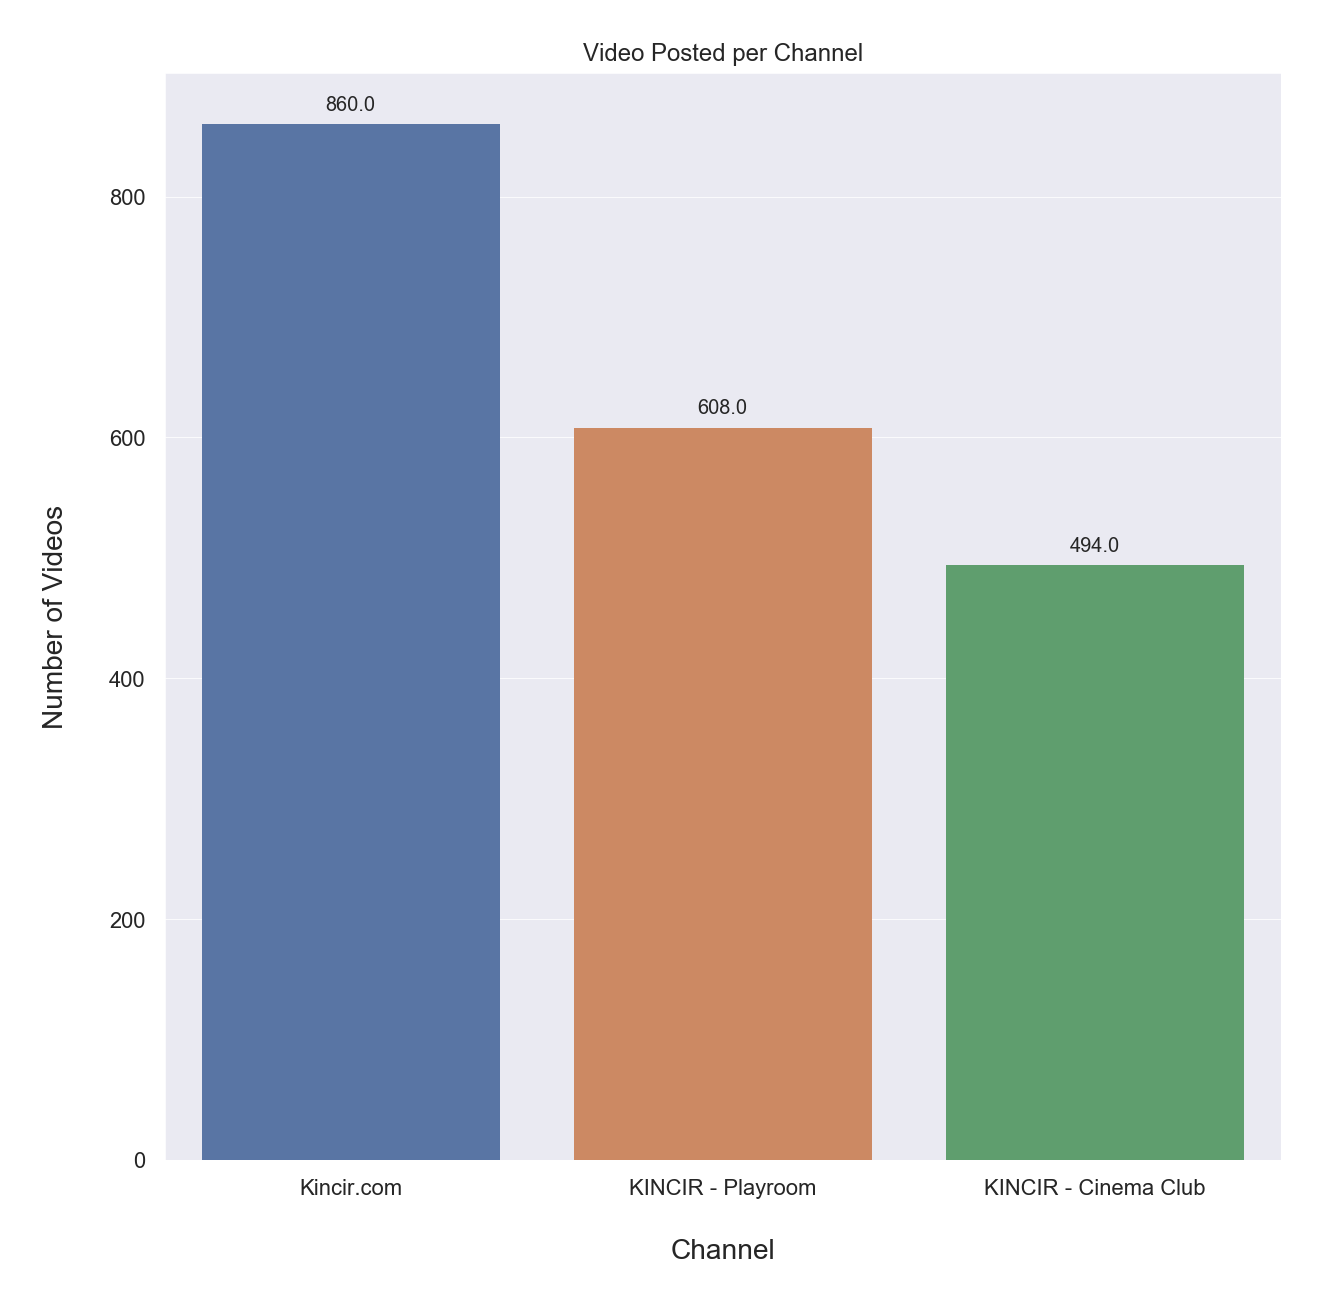

In [44]:
allkincirchannel = result['channelTitle'].value_counts().reset_index()
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax = sns.barplot(x=allkincirchannel['index'],y=allkincirchannel['channelTitle'], data=allkincirchannel)
plt.ylabel("Number of Videos")
plt.xlabel("Channel")
plt.title("Video Posted per Channel")

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)



### Finding Number of Video Uploaded each Day

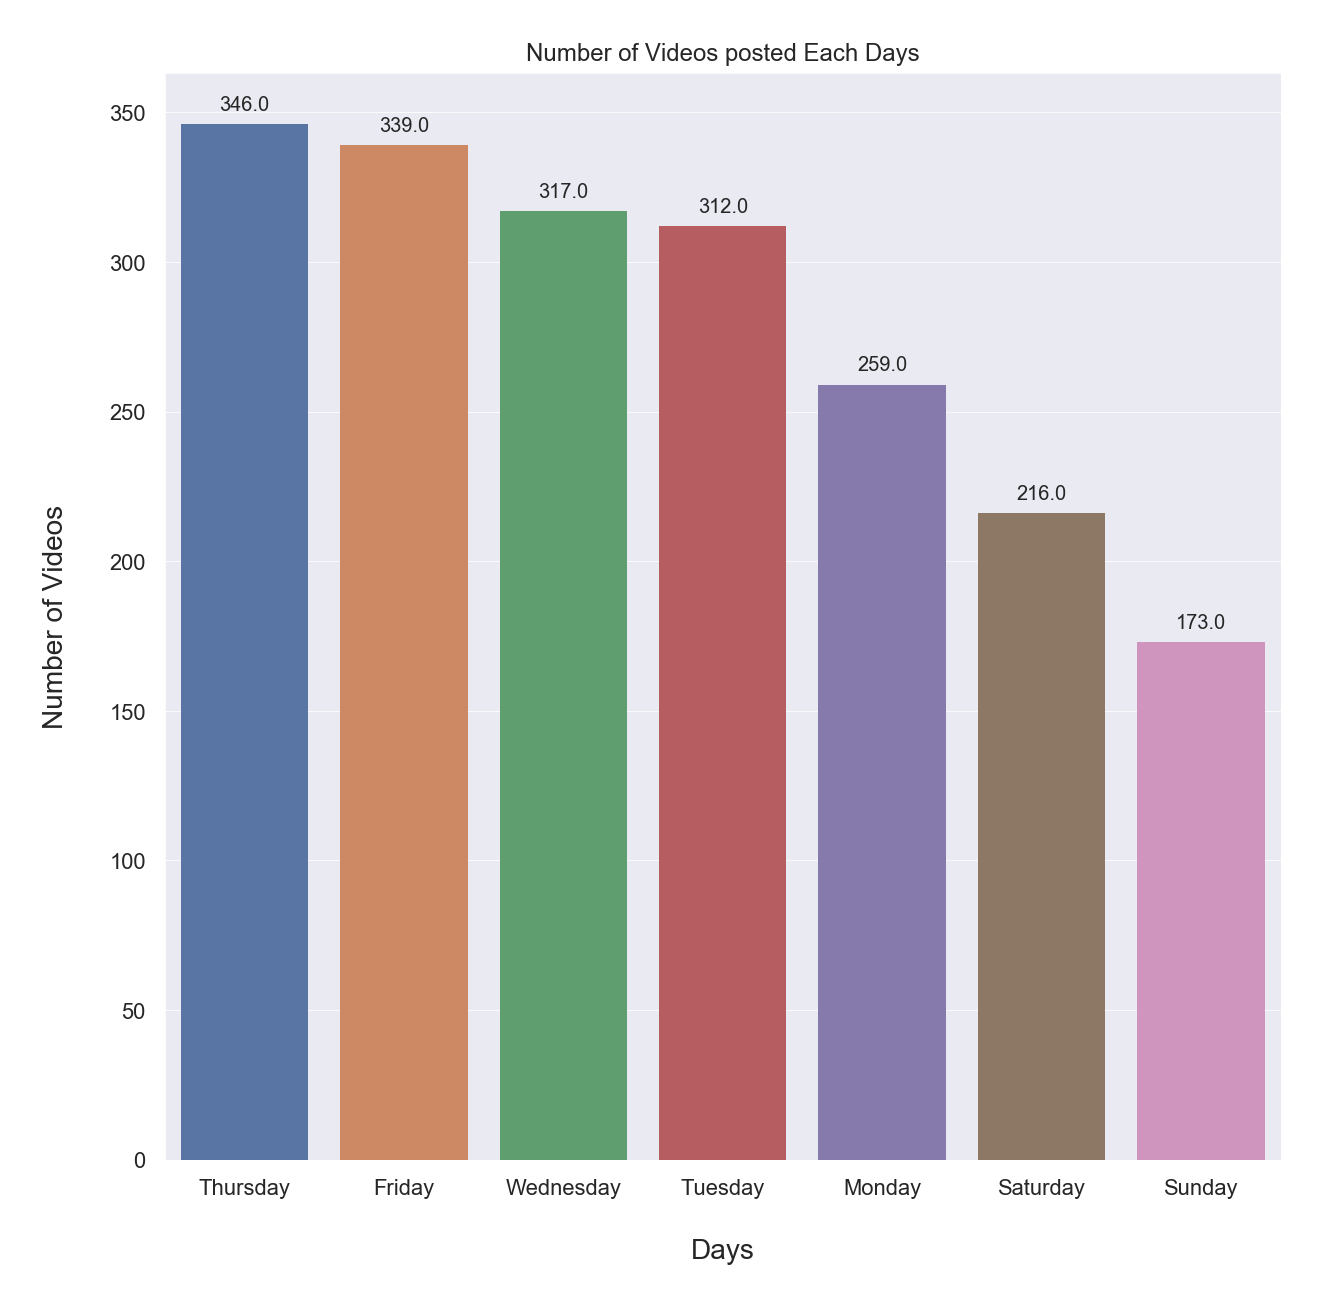

In [45]:
cat_df_gb = result['day_of_week'].value_counts().reset_index()
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax1 = sns.barplot(x=cat_df_gb['index'],y=cat_df_gb['day_of_week'], data=cat_df_gb)
plt.ylabel("Number of Videos")
plt.xlabel("Days")
plt.title("Number of Videos posted Each Days")

rects1 = ax1.patches

for rect in rects1:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)



### Finding Number of Video Uploaded by Hours

In [121]:
result['hour'] = pd.to_datetime(result['Hour Published'], format='%H:%M:%S').dt.hour

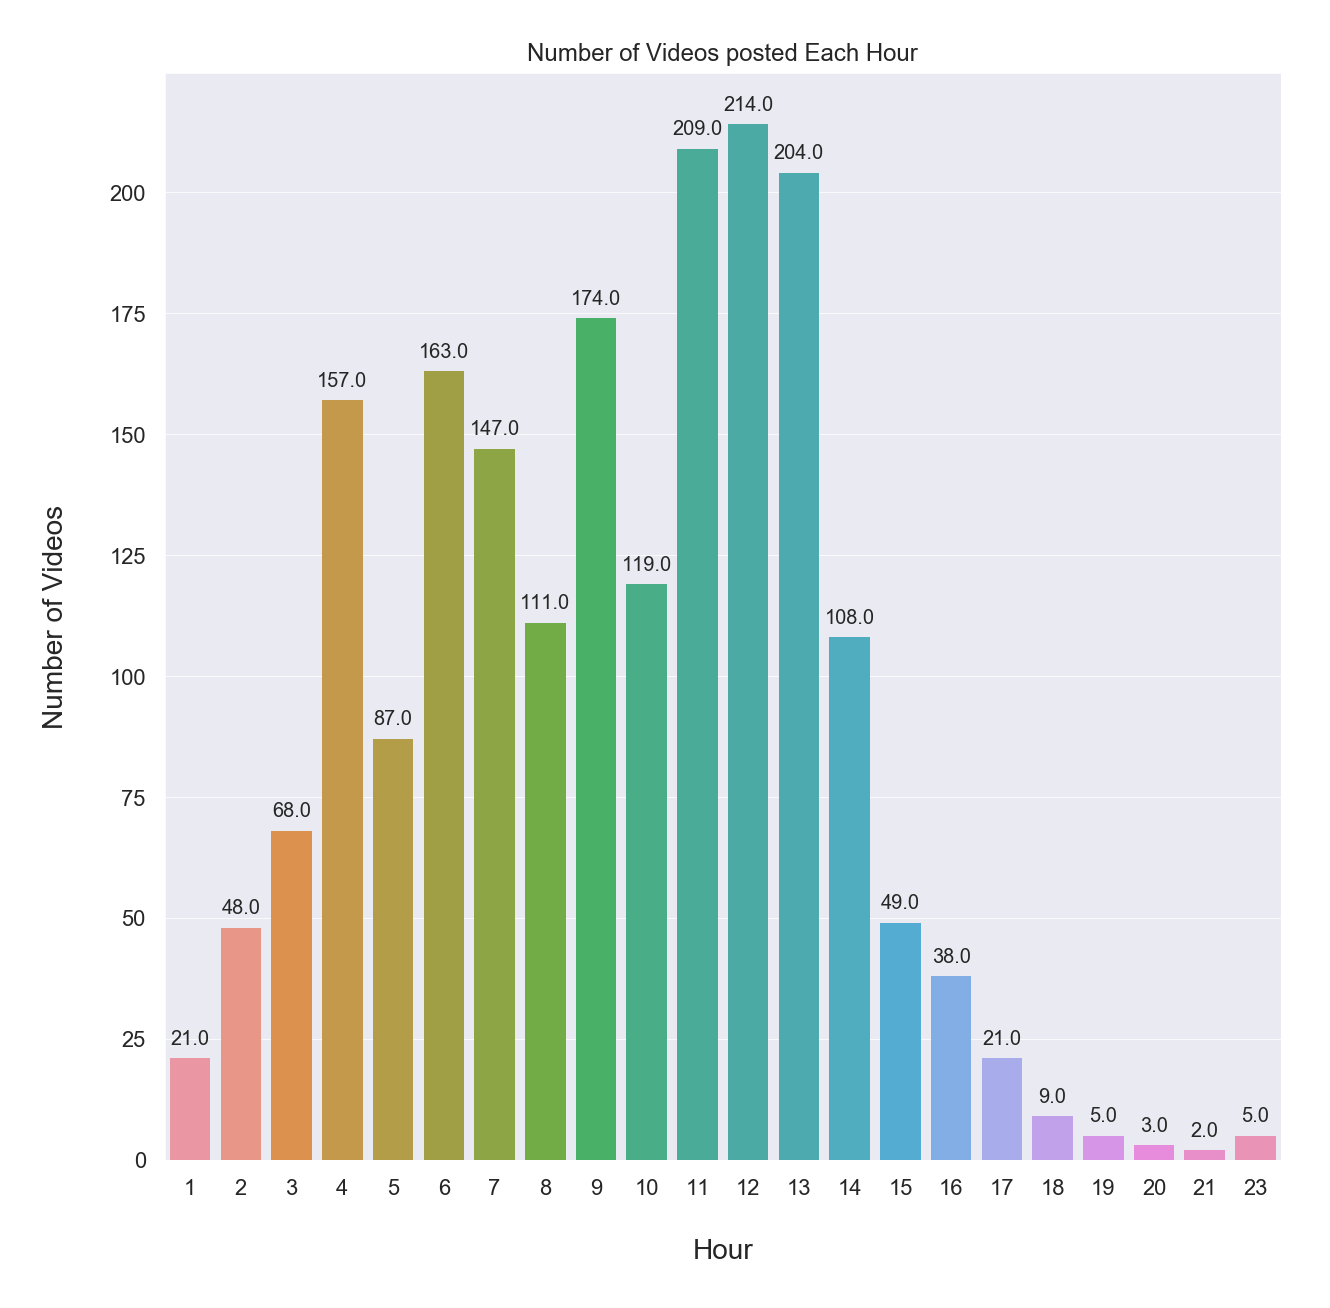

In [123]:
hourDataAll = result['hour'].value_counts().reset_index()

plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax123 = sns.barplot(x=hourDataAll['index'],y=hourDataAll['hour'], data=hourDataAll)
plt.ylabel("Number of Videos")
plt.xlabel("Hour")
plt.title("Number of Videos posted Each Hour")

rects123 = ax123.patches

for rect in rects123:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)



### KINCIR CINEMA video uploaded per day

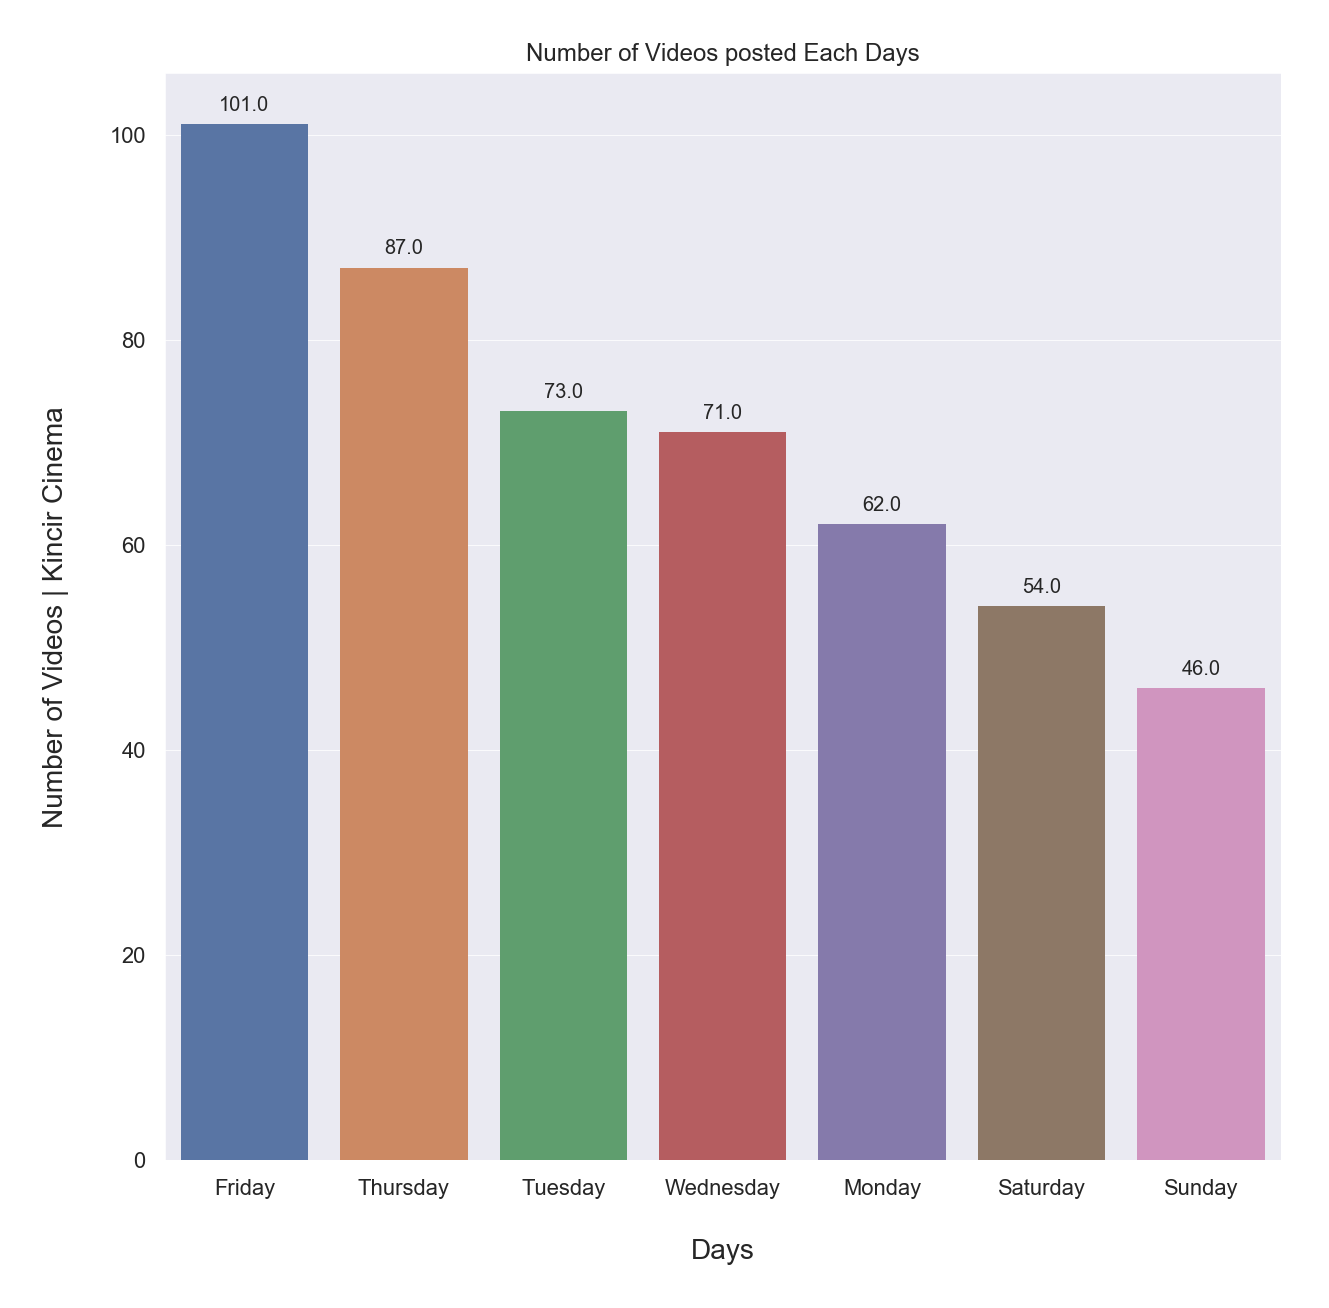

In [133]:
CinemaDF = dfCinema['day_of_week'].value_counts().reset_index()
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax112 = sns.barplot(x=CinemaDF['index'],y=CinemaDF['day_of_week'], data=CinemaDF)
plt.ylabel("Number of Videos | Kincir Cinema")
plt.xlabel("Days")
plt.title("Number of Videos posted Each Days")

rects112 = ax112.patches

for rect in rects112:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)



### KINCIR CINEMA Video Uploaded by Hours

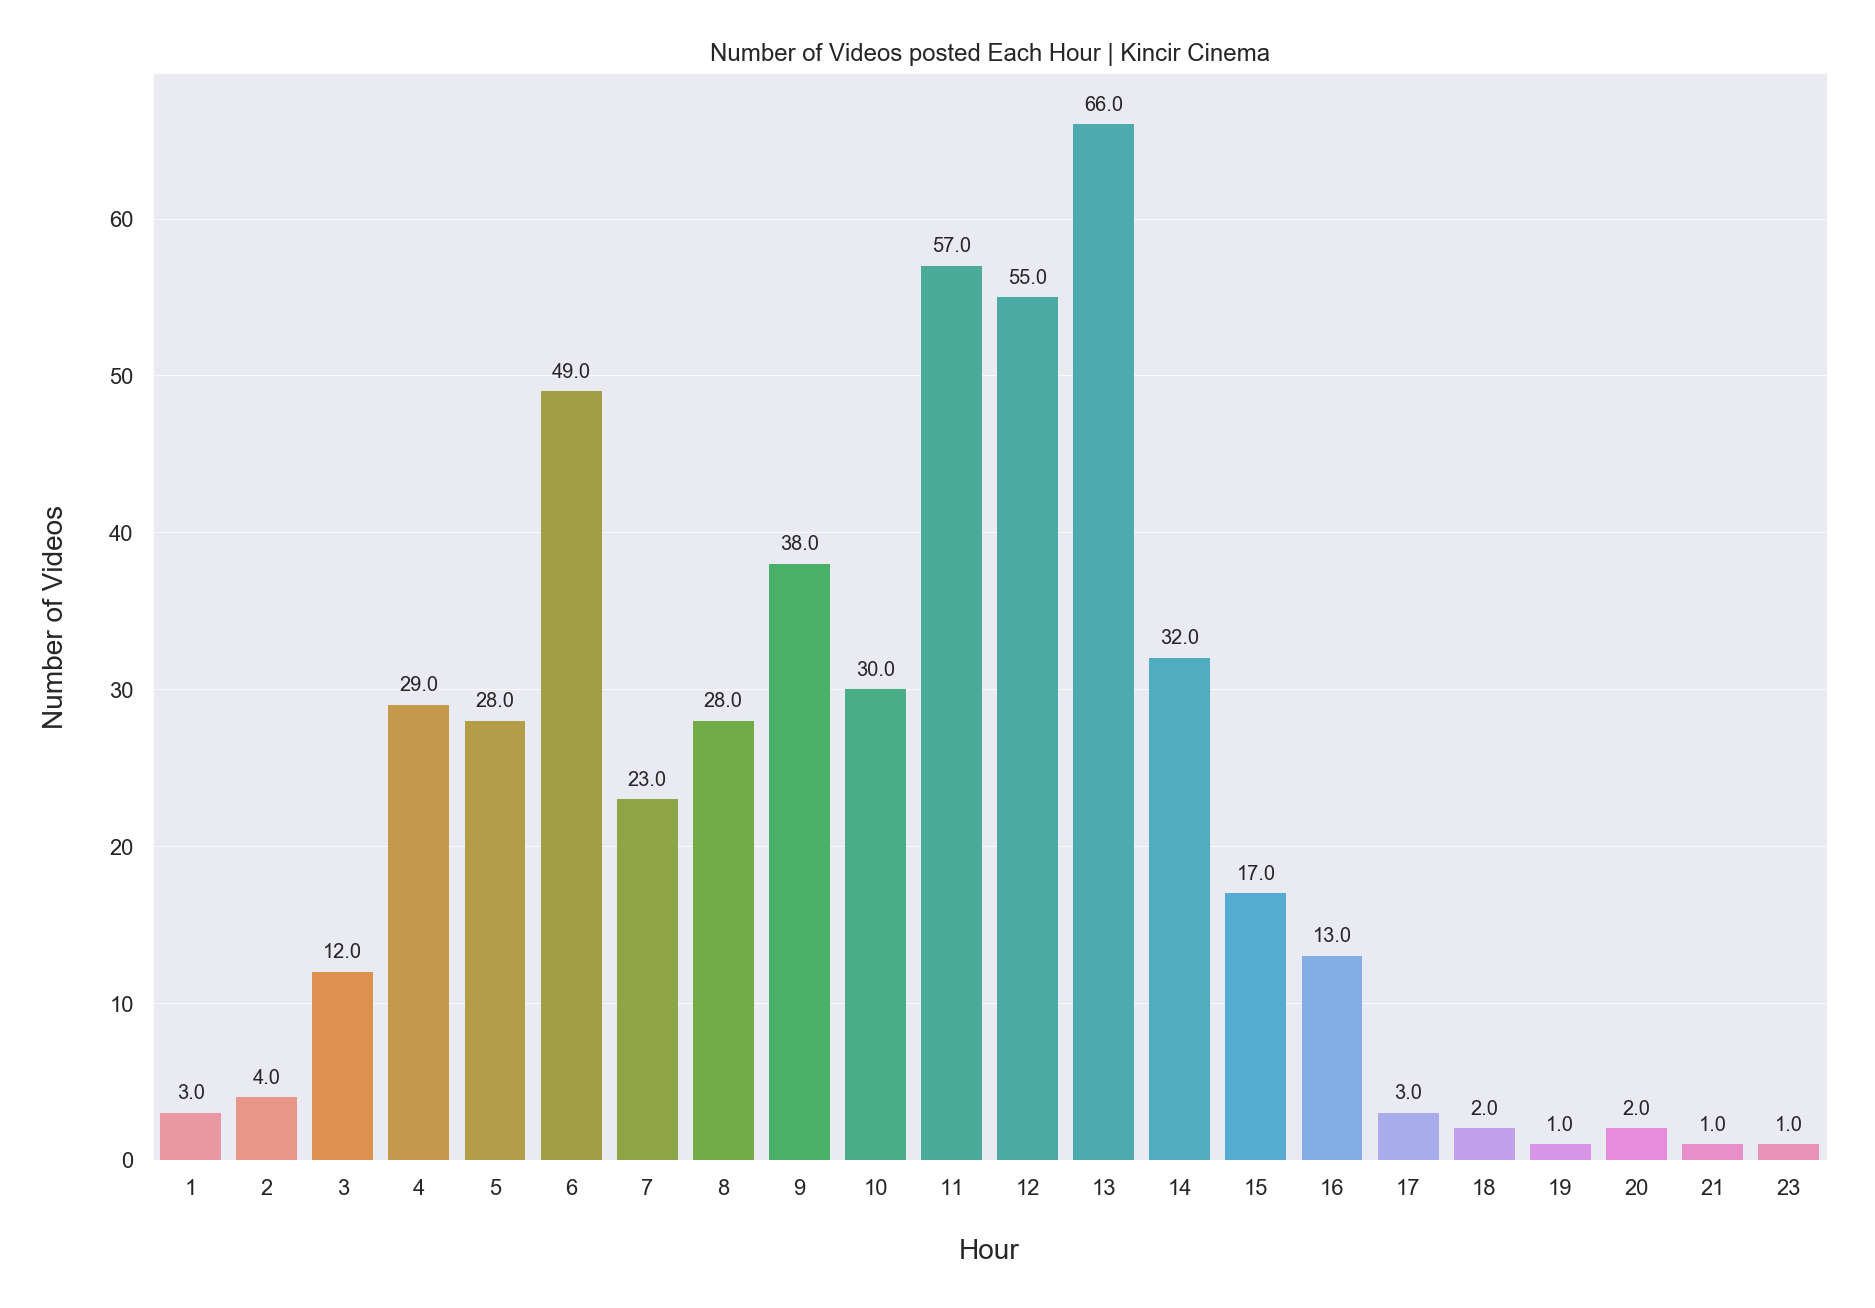

In [135]:
hourDataAll1 = dfCinema['hour'].value_counts().reset_index()

plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax1234 = sns.barplot(x=hourDataAll1['index'],y=hourDataAll1['hour'], data=hourDataAll1)
plt.ylabel("Number of Videos")
plt.xlabel("Hour")
plt.title("Number of Videos posted Each Hour | Kincir Cinema")

rects1234 = ax1234.patches

for rect in rects1234:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)



### Kincir Playroom Number of Video Uploaded per Day

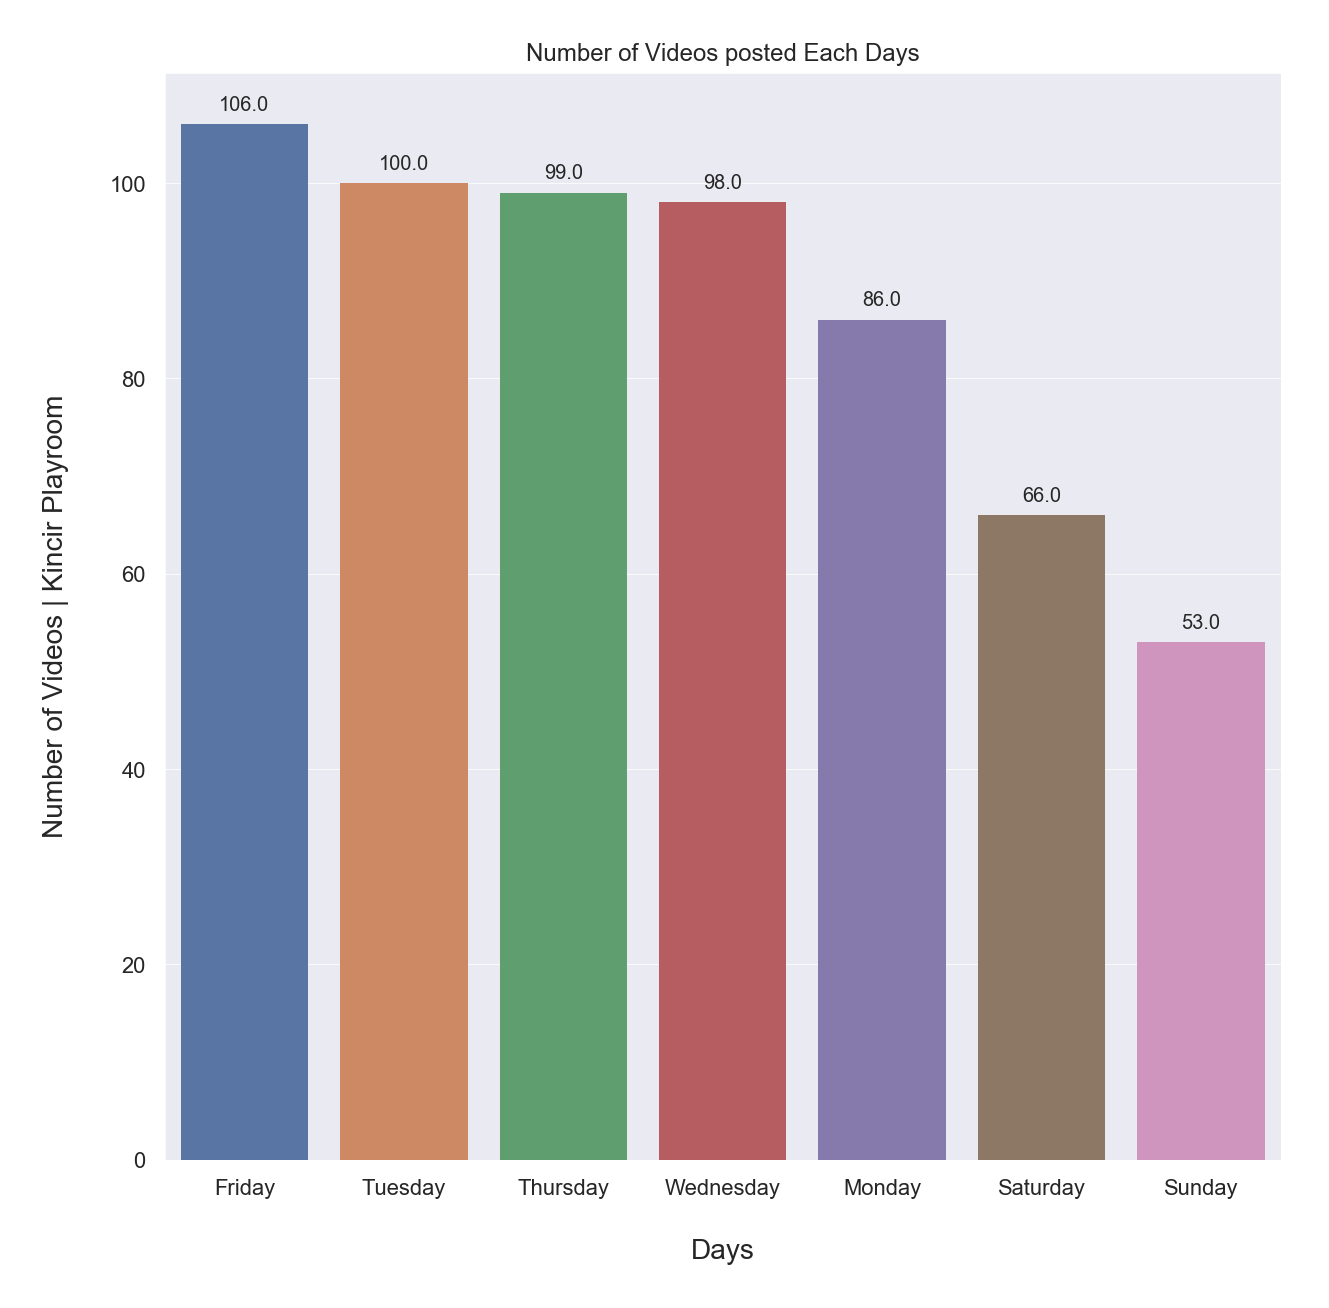

In [91]:
PlayroomDF = dfPlayroom['day_of_week'].value_counts().reset_index()
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax113 = sns.barplot(x=PlayroomDF['index'],y=PlayroomDF['day_of_week'], data=PlayroomDF)
plt.ylabel("Number of Videos | Kincir Playroom")
plt.xlabel("Days")
plt.title("Number of Videos posted Each Days")

rects113 = ax113.patches

for rect in rects113:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)



### Kincir Playroom Video Uploaded by Hours

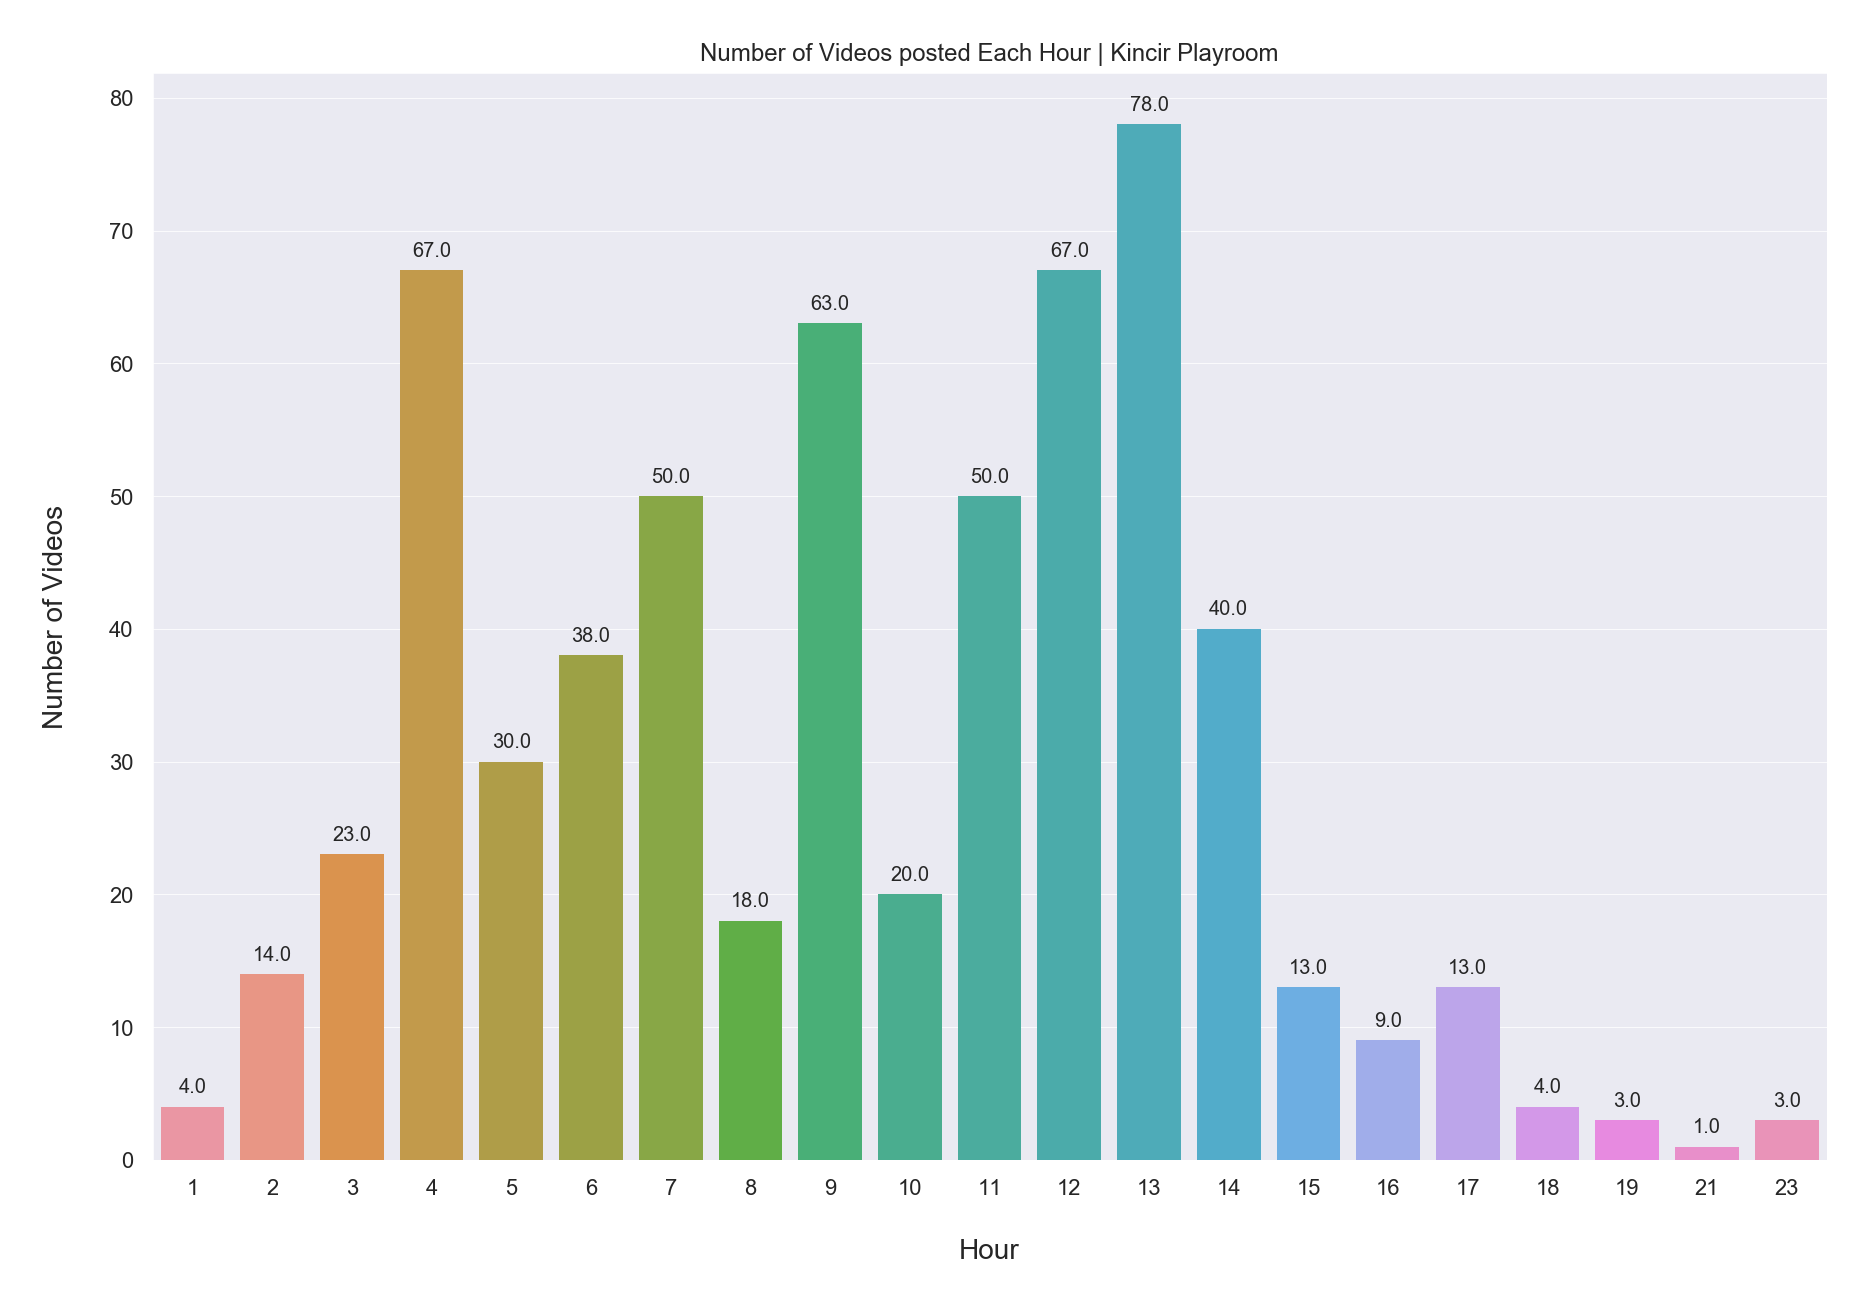

In [137]:
hourDataAll2 = dfPlayroom['hour'].value_counts().reset_index()

plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax1222 = sns.barplot(x=hourDataAll2['index'],y=hourDataAll2['hour'], data=hourDataAll2)
plt.ylabel("Number of Videos")
plt.xlabel("Hour")
plt.title("Number of Videos posted Each Hour | Kincir Playroom")

rects1222 = ax1222.patches

for rect in rects1222:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)



### Kincir.com Video Uploaded per Day 

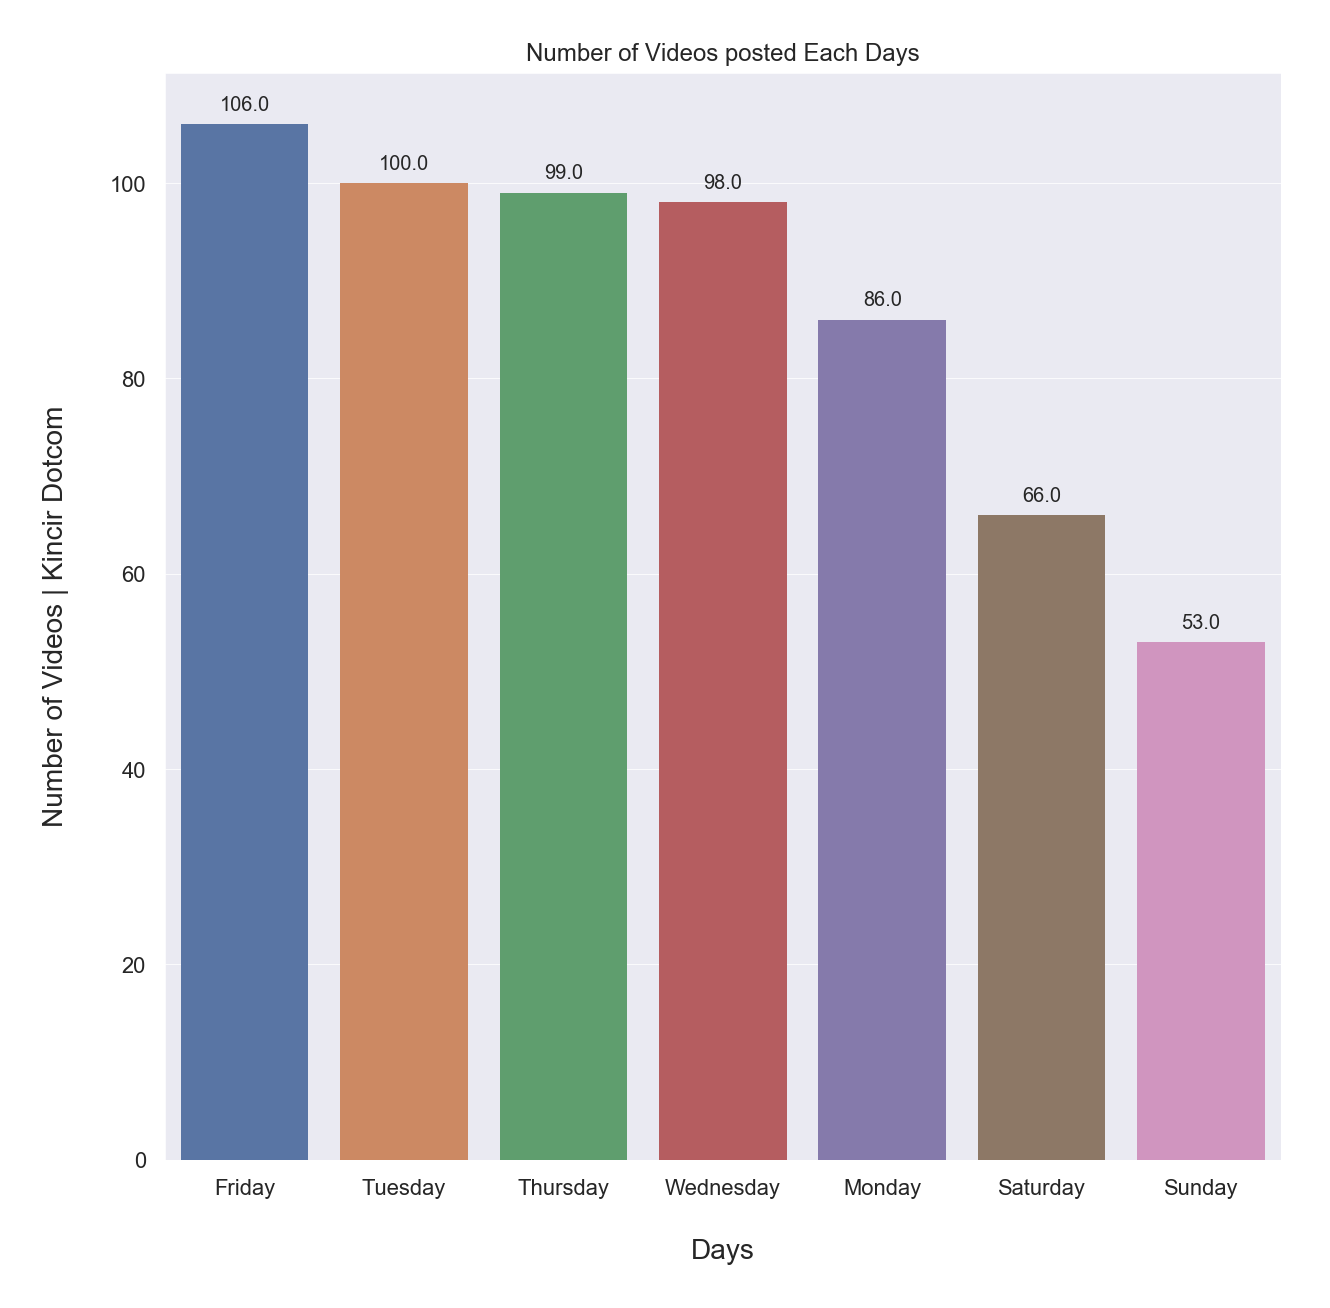

In [92]:
KincirDF = dfKincir['day_of_week'].value_counts().reset_index()
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax114 = sns.barplot(x=KincirDF['index'],y=KincirDF['day_of_week'], data=KincirDF)
plt.ylabel("Number of Videos | Kincir Dotcom")
plt.xlabel("Days")
plt.title("Number of Videos posted Each Days")

rects114 = ax114.patches

for rect in rects114:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)



### Kincir.com Video Uploaded by Hours

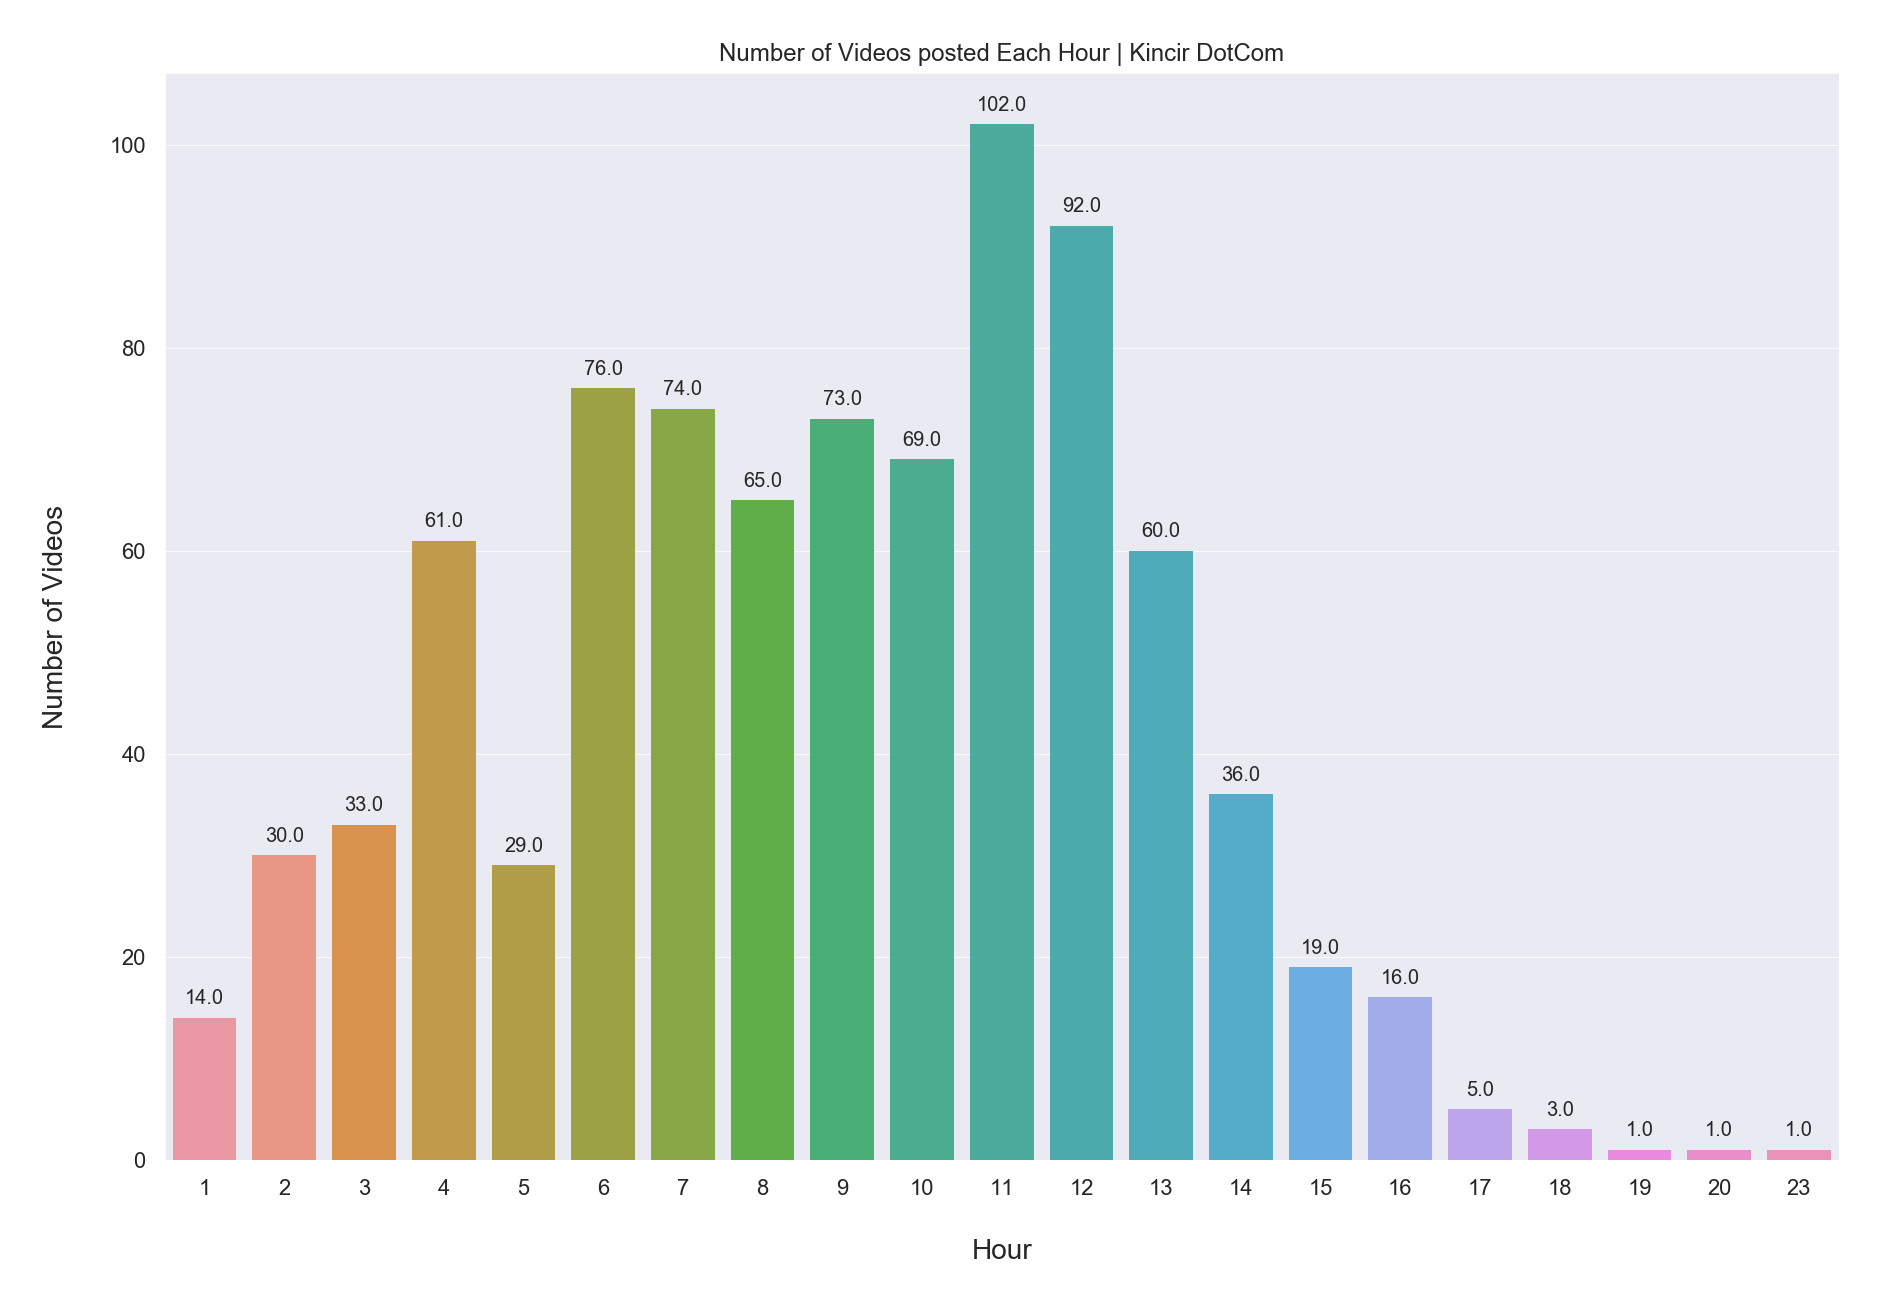

In [138]:
hourDataAll3 = dfKincir['hour'].value_counts().reset_index()

plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
ax1232 = sns.barplot(x=hourDataAll3['index'],y=hourDataAll3['hour'], data=hourDataAll3)
plt.ylabel("Number of Videos")
plt.xlabel("Hour")
plt.title("Number of Videos posted Each Hour | Kincir DotCom")

rects1232 = ax1232.patches

for rect in rects1232:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)



### Combined Data - Number of Views per Day

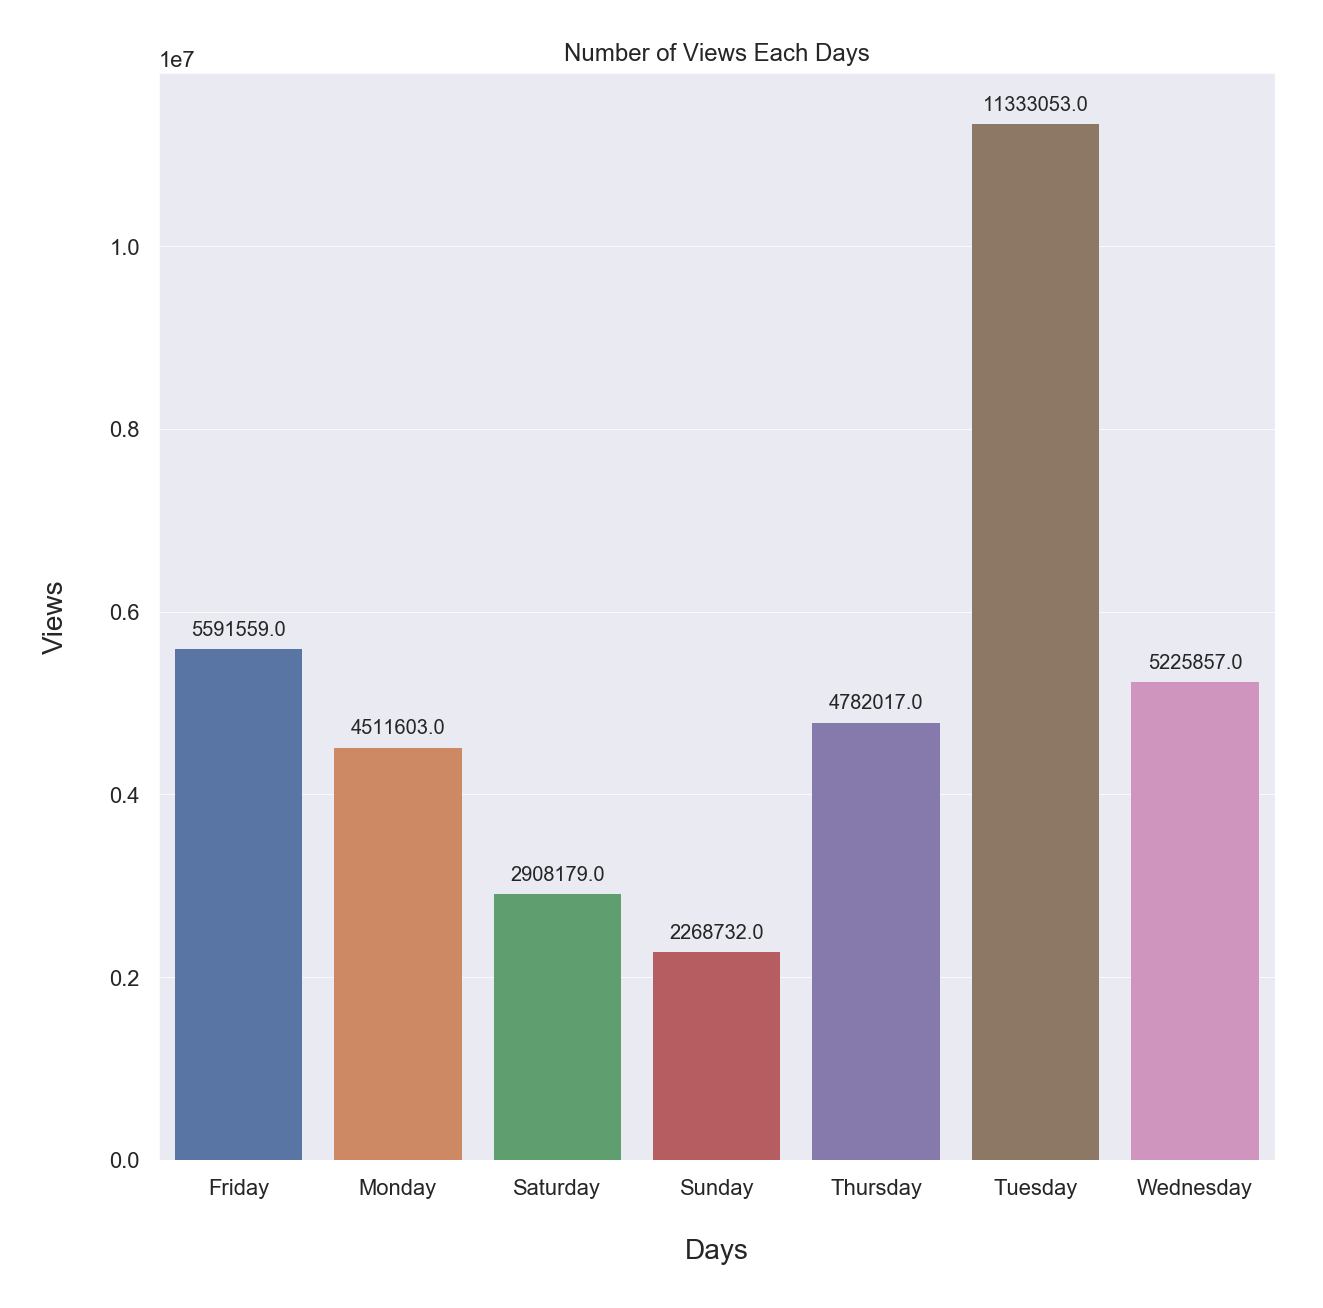

In [46]:
groupedvalues=result.groupby('day_of_week').sum().reset_index()

plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax2 = sns.barplot(y='viewCount', x='day_of_week', data=groupedvalues)
plt.xlabel("Days")
plt.ylabel("Views")
plt.title("Number of Views Each Days")



rects2 = ax2.patches

for rect in rects2:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)


### Combined Data - Number of Views by Hours

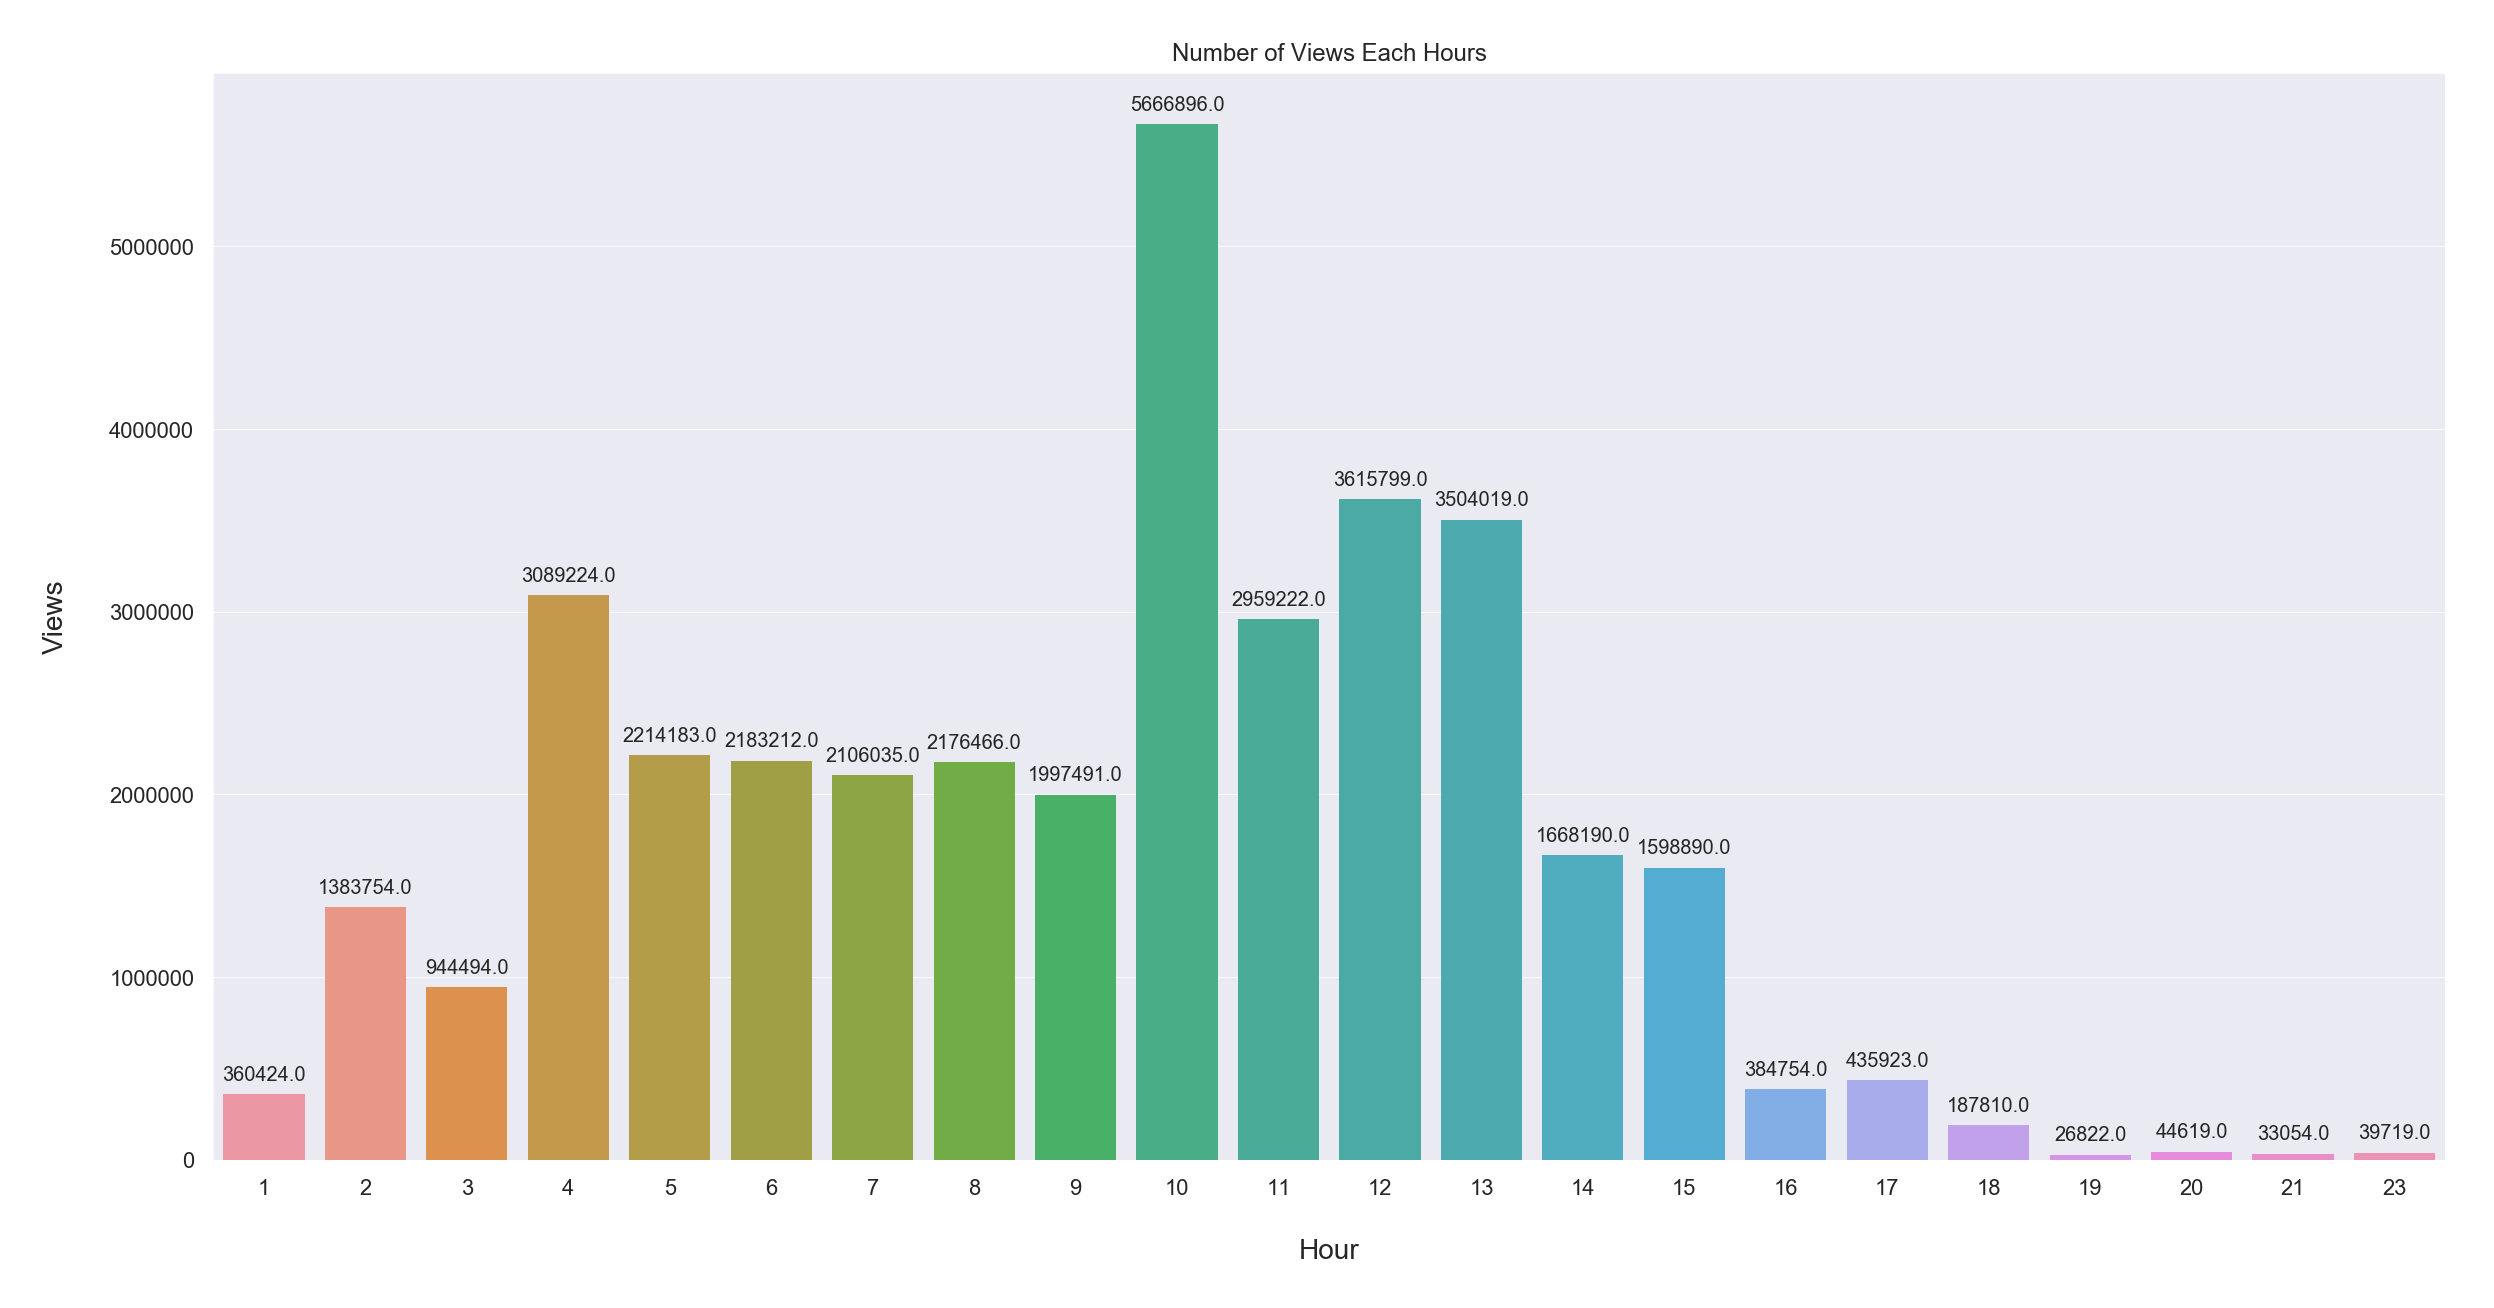

In [128]:
TimeViews=result.groupby('hour').sum().reset_index()

plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax221 = sns.barplot(y='viewCount', x='hour', data=TimeViews)
plt.xlabel("Hour")
plt.ylabel("Views")
plt.title("Number of Views Each Hours")



rects221 = ax221.patches

for rect in rects221:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)


### KINCIR CINEMA - Number of Views by Day

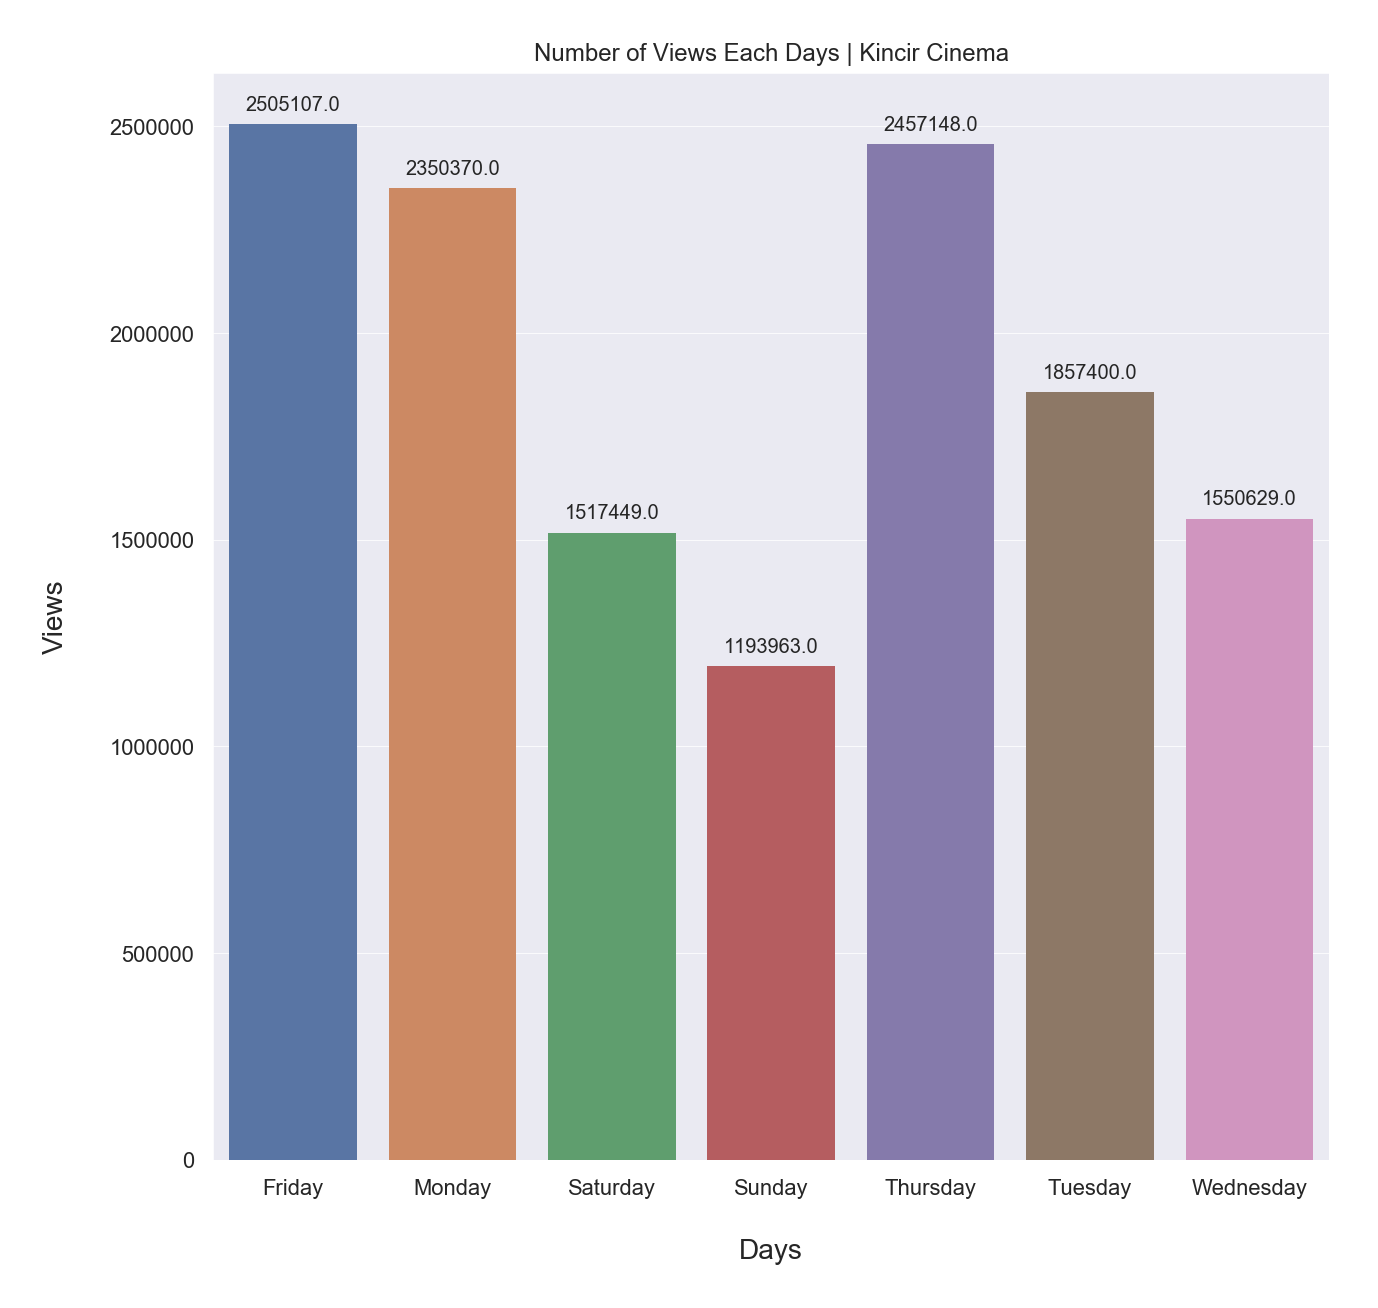

In [93]:
ViewDayCinema=dfCinema.groupby('day_of_week').sum().reset_index()

plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax22 = sns.barplot(y='viewCount', x='day_of_week', data=ViewDayCinema)
plt.xlabel("Days")
plt.ylabel("Views")
plt.title("Number of Views Each Days | Kincir Cinema")



rects22 = ax22.patches

for rect in rects22:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)


### KINCIR CINEMA - Number of Views by Hours

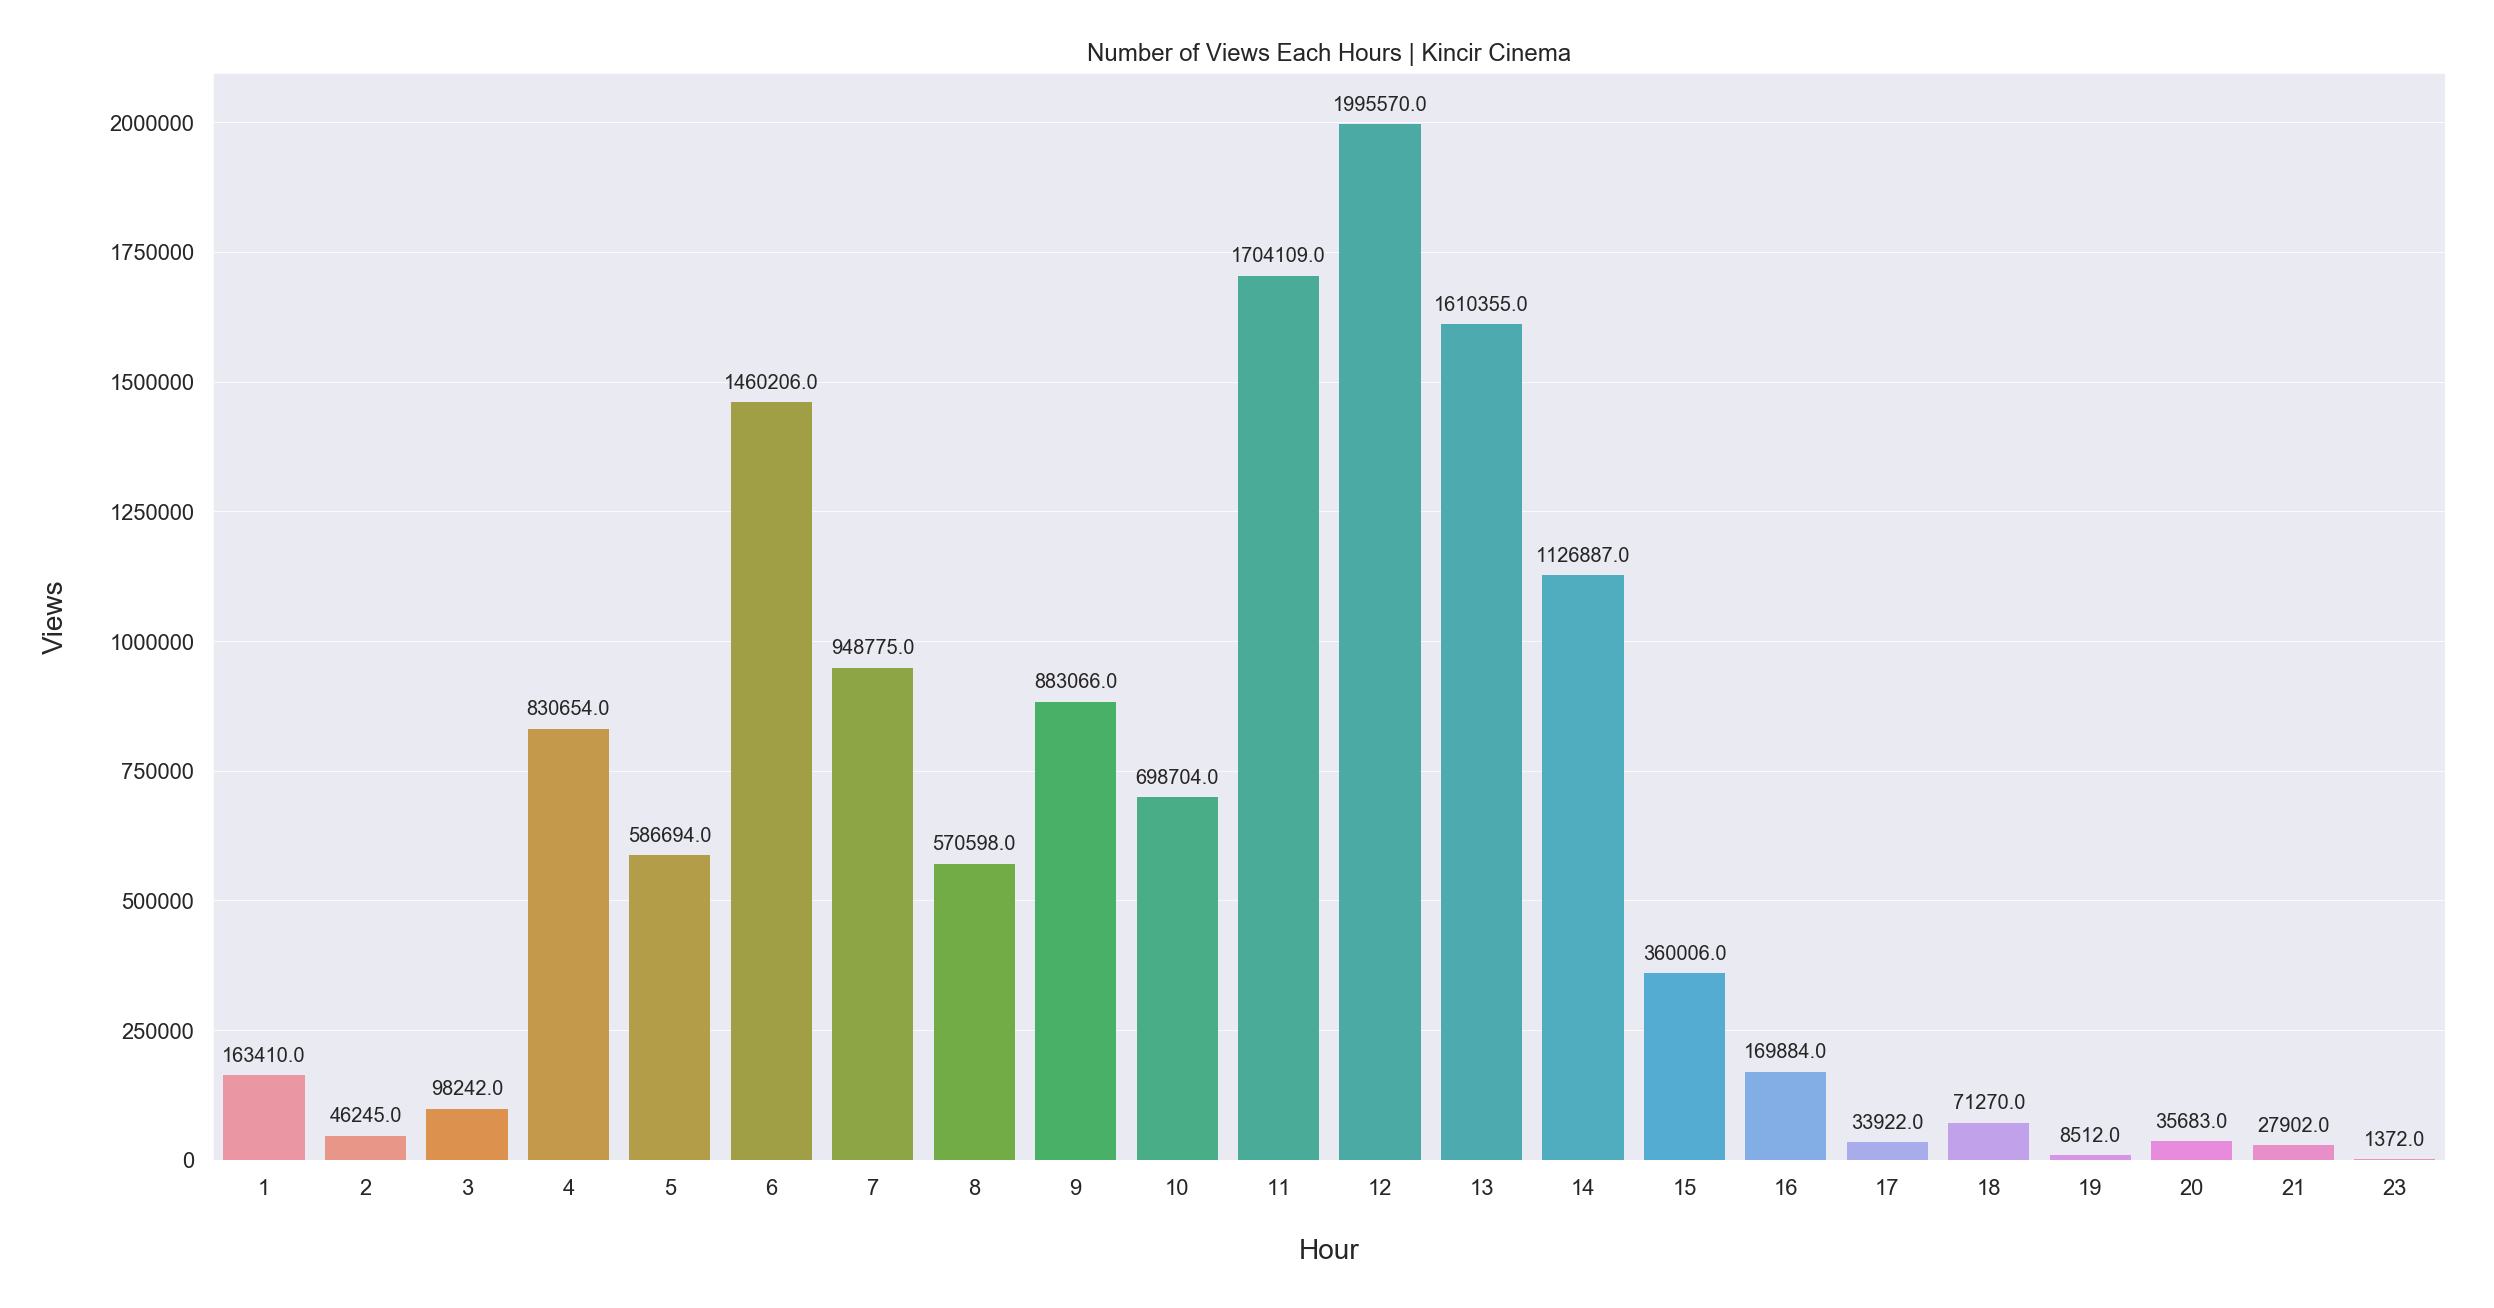

In [139]:
TimeCinema=dfCinema.groupby('hour').sum().reset_index()

plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax2121 = sns.barplot(y='viewCount', x='hour', data=TimeCinema)
plt.xlabel("Hour")
plt.ylabel("Views")
plt.title("Number of Views Each Hours | Kincir Cinema")



rects2121 = ax2121.patches

for rect in rects2121:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)


### KINCIR PLAYROOM - Number of Views by Day

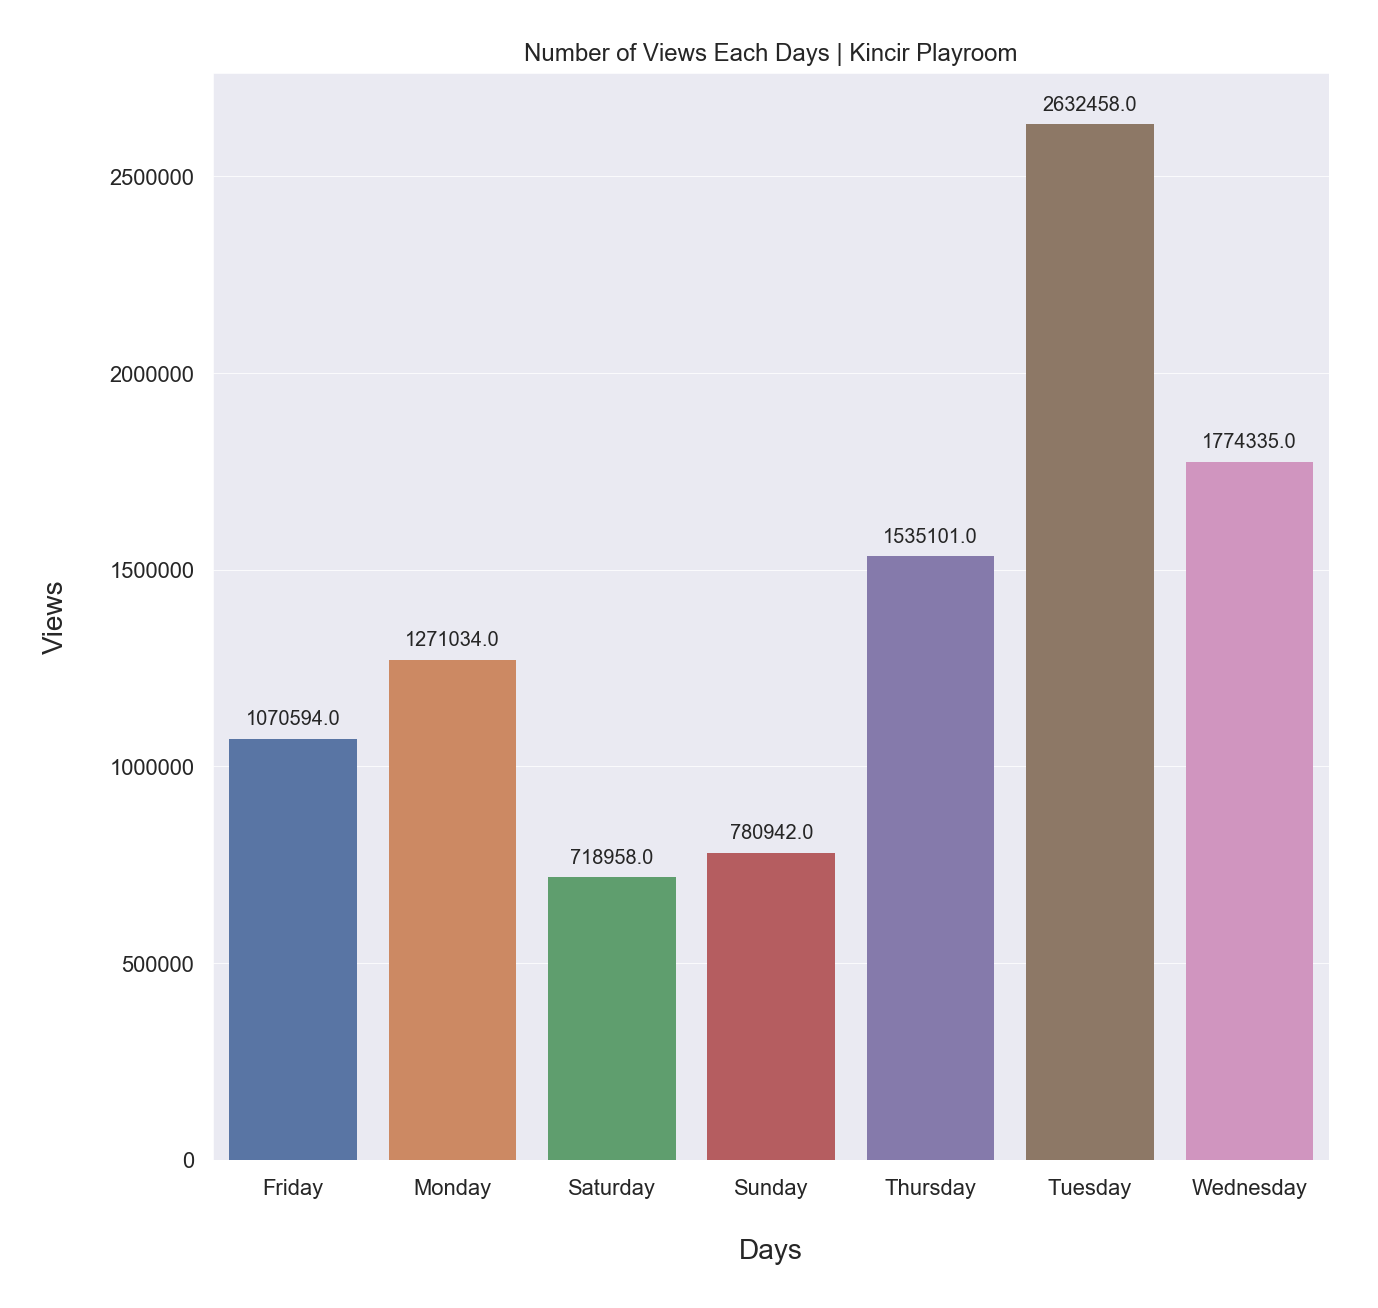

In [94]:
ViewDayPlayroom=dfPlayroom.groupby('day_of_week').sum().reset_index()

plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax23 = sns.barplot(y='viewCount', x='day_of_week', data=ViewDayPlayroom)
plt.xlabel("Days")
plt.ylabel("Views")
plt.title("Number of Views Each Days | Kincir Playroom")



rects23 = ax23.patches

for rect in rects23:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)


### KINCIR PLAYROOM - Number of Views by Hours

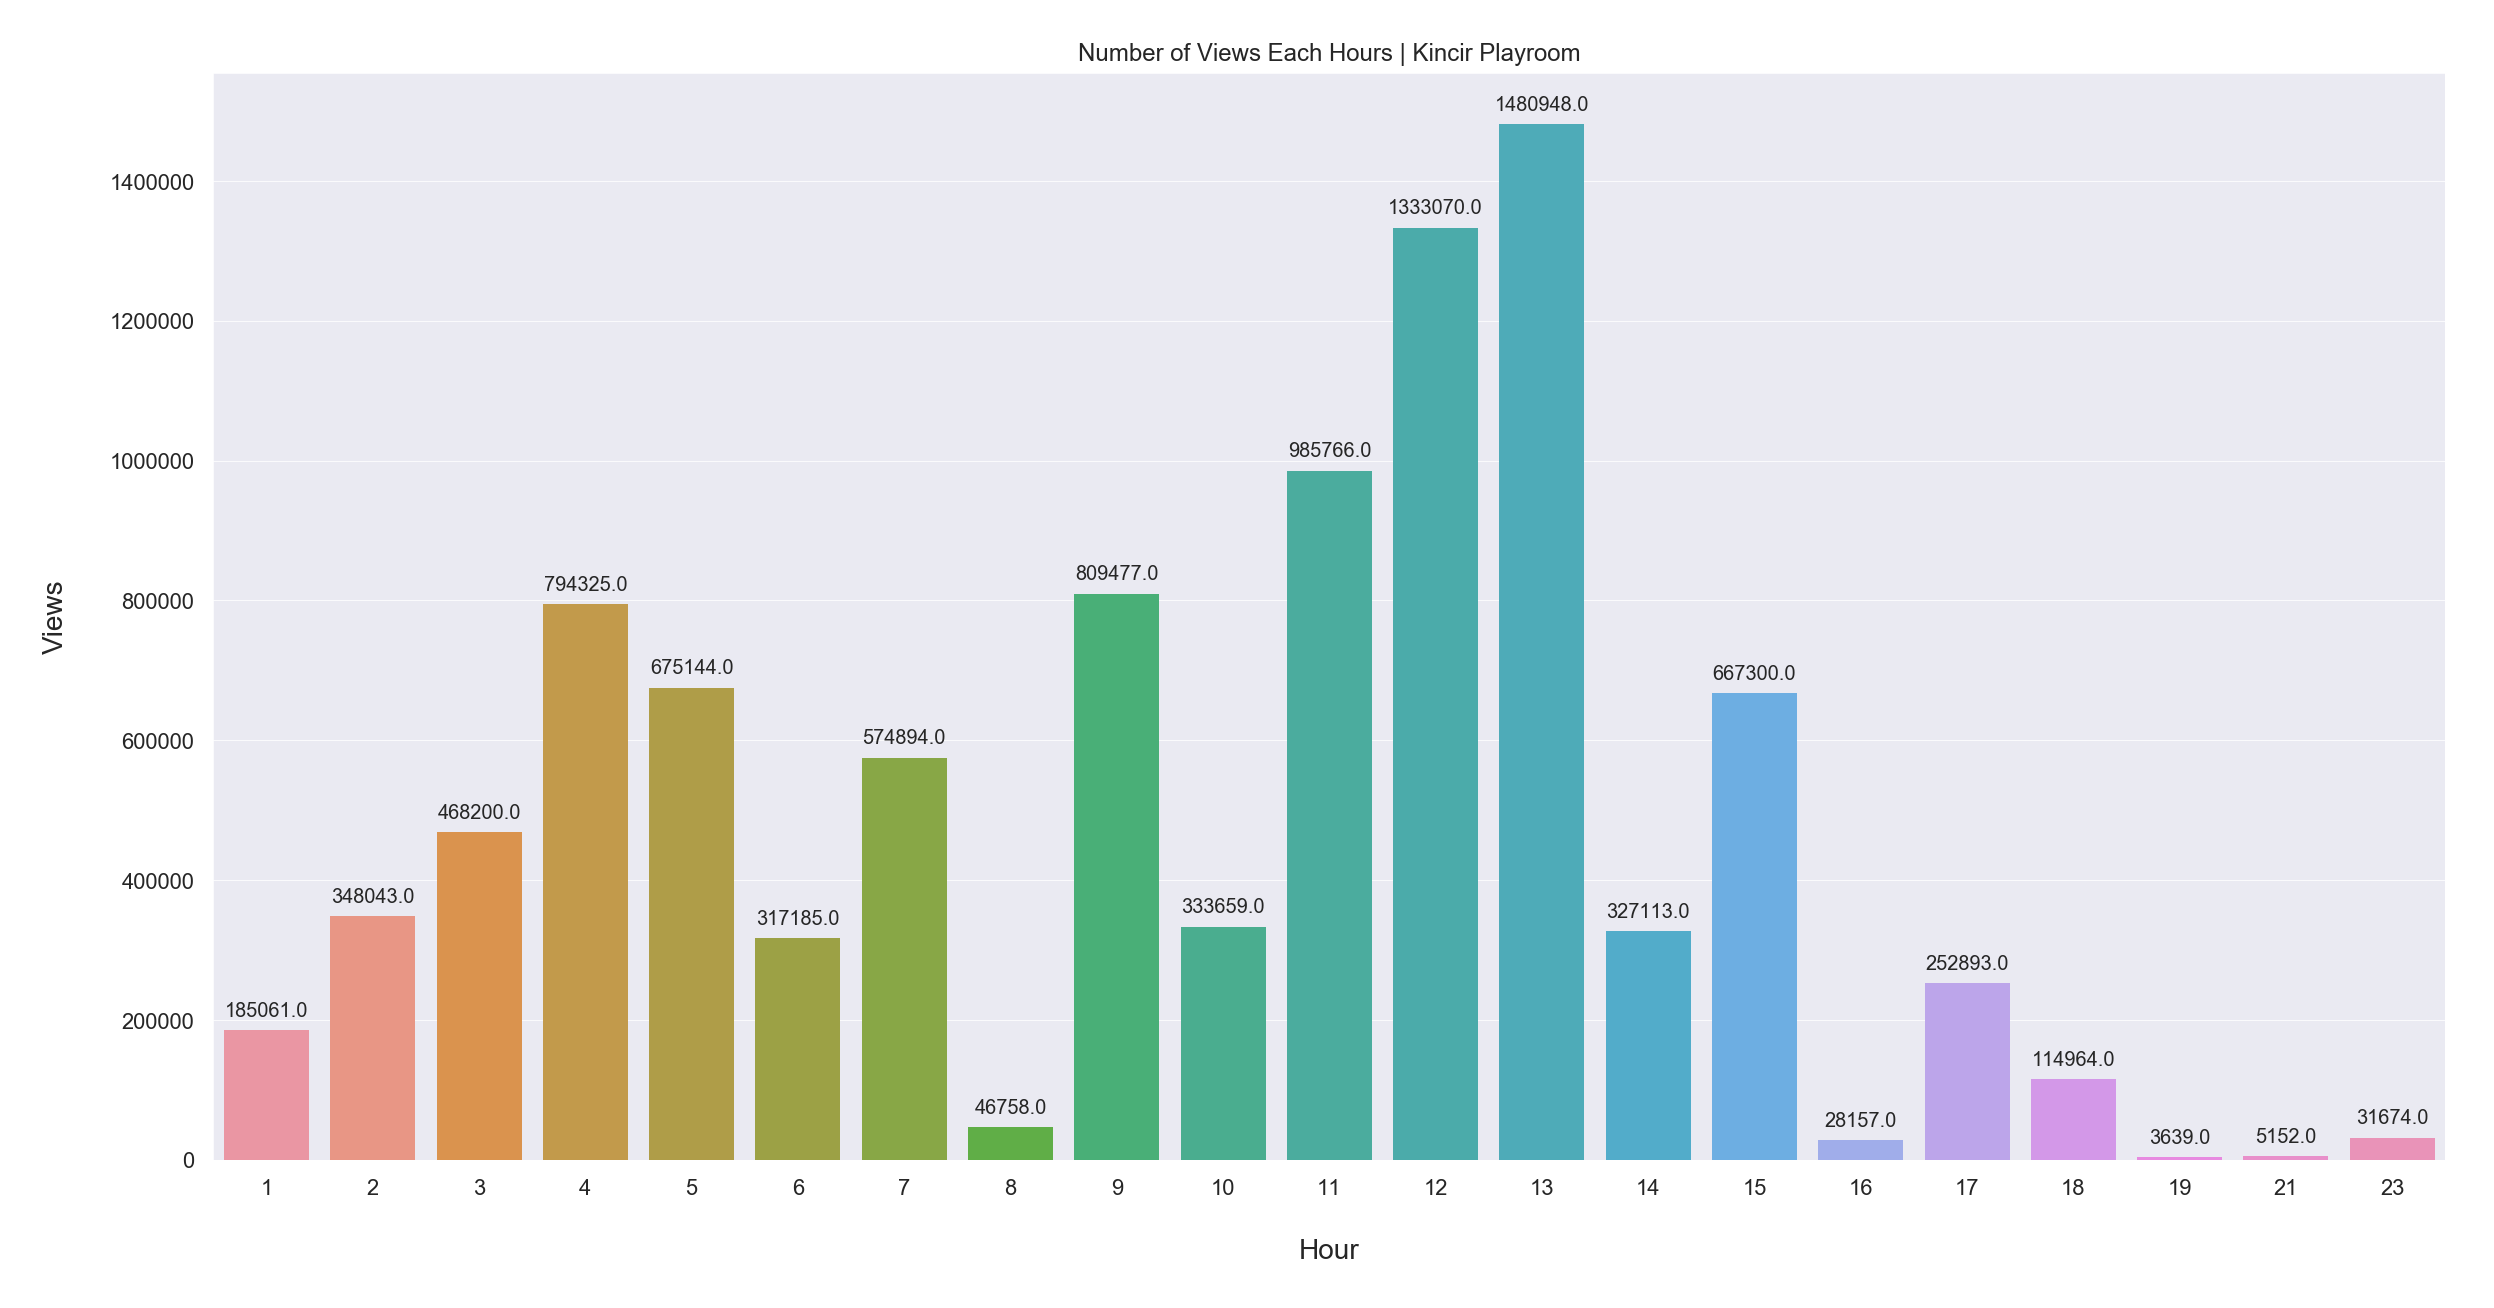

In [140]:
TimePlayroom=dfPlayroom.groupby('hour').sum().reset_index()

plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax2123 = sns.barplot(y='viewCount', x='hour', data=TimePlayroom)
plt.xlabel("Hour")
plt.ylabel("Views")
plt.title("Number of Views Each Hours | Kincir Playroom")



rects2123 = ax2123.patches

for rect in rects2123:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)


### KINCIR.COM - Number of Views by Day

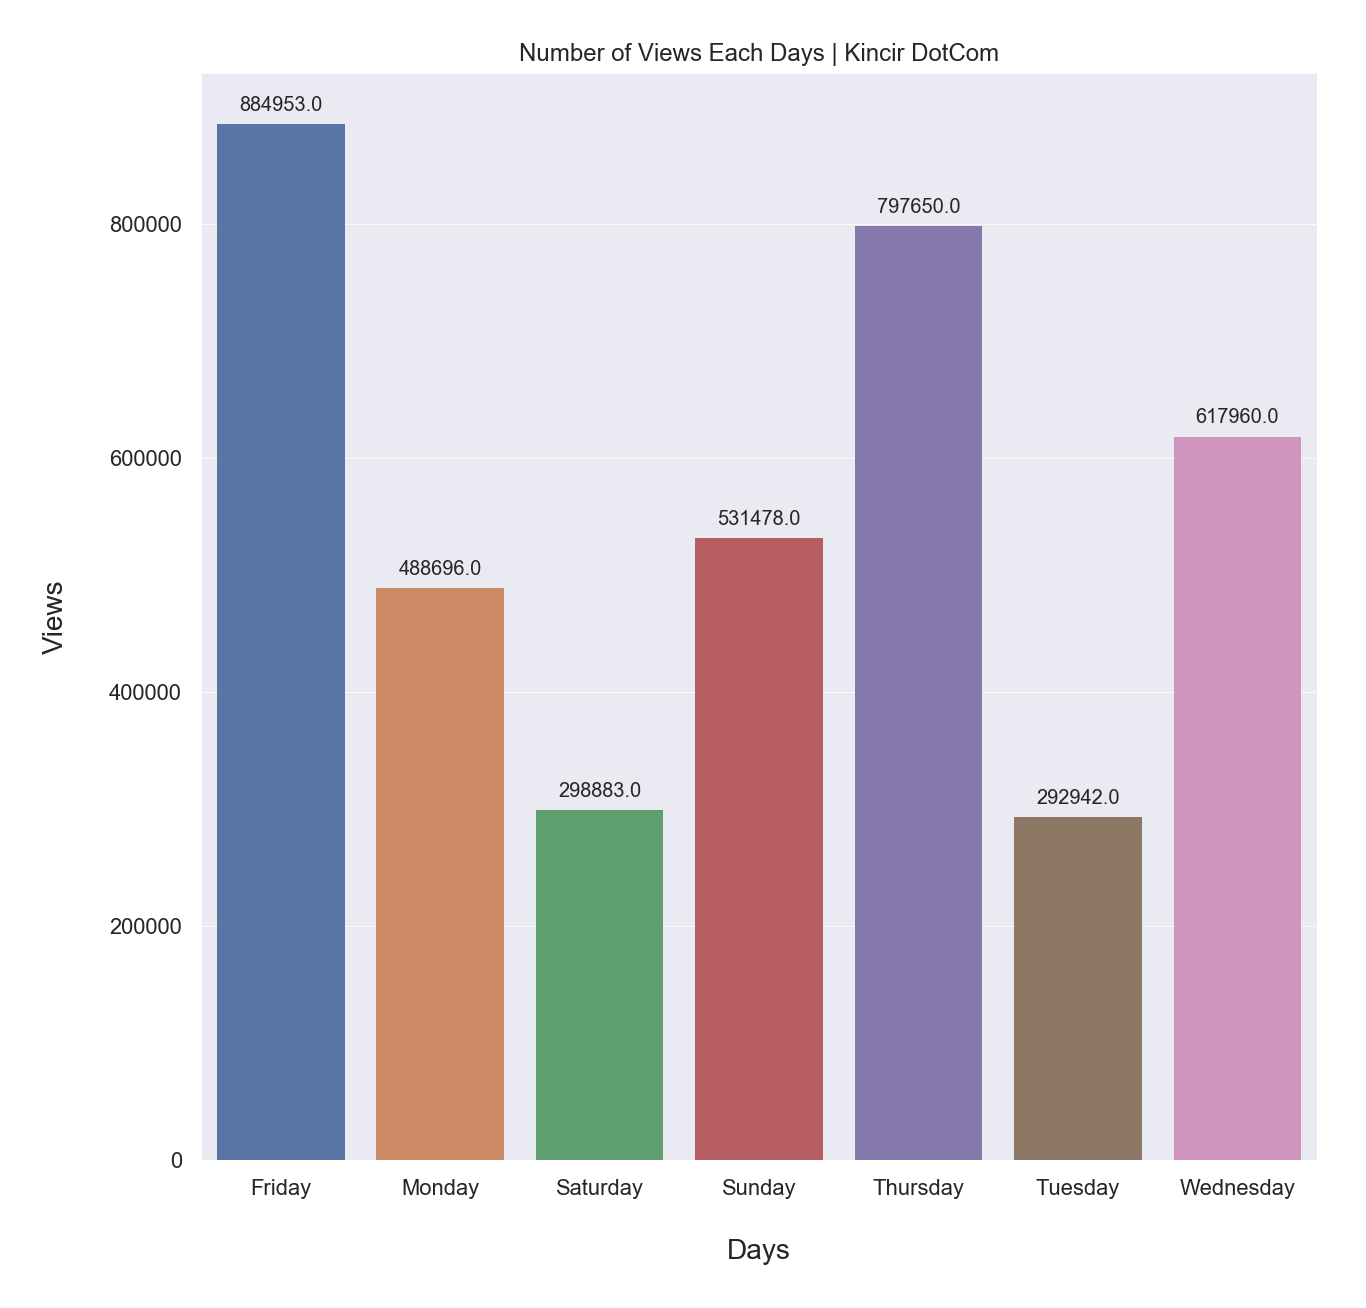

In [124]:
ViewDayKINCIR=dfKincir.groupby('day_of_week').sum().reset_index()

plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax213 = sns.barplot(y='viewCount', x='day_of_week', data=ViewDayKINCIR)
plt.xlabel("Days")
plt.ylabel("Views")
plt.title("Number of Views Each Days | Kincir DotCom")



rects213 = ax213.patches

for rect in rects213:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)


### KINCIR.COM - Number of Views by Hours

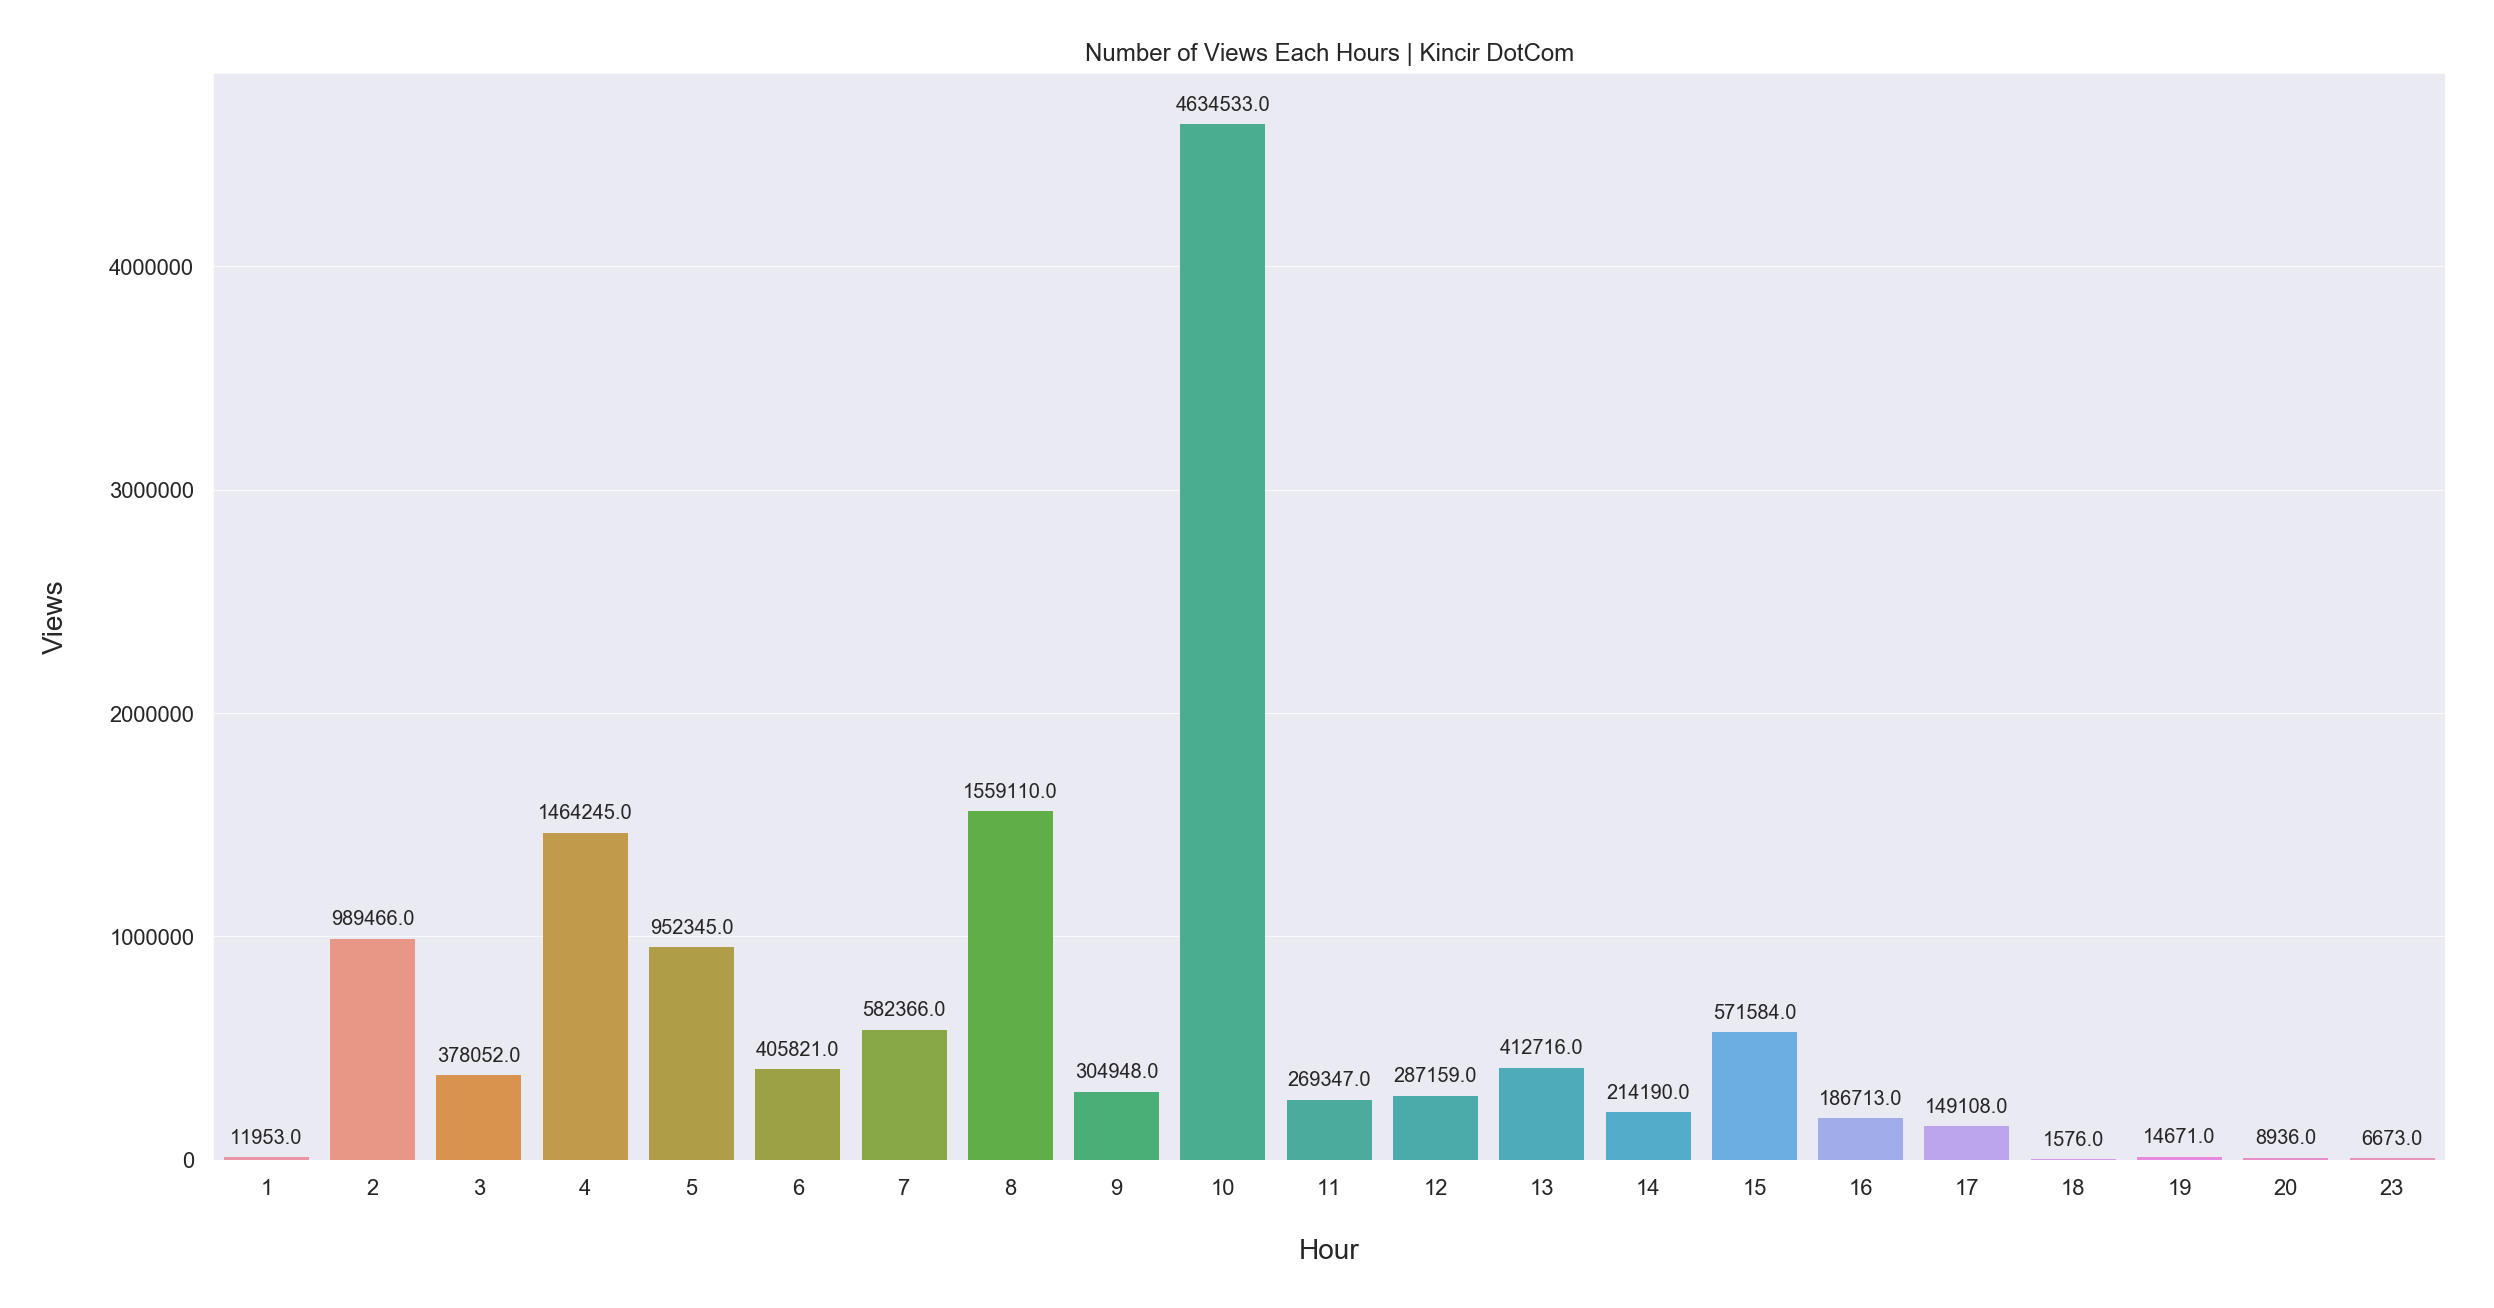

In [142]:
TimeKincir=dfKincir.groupby('hour').sum().reset_index()

plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
ax1223 = sns.barplot(y='viewCount', x='hour', data=TimeKincir)
plt.xlabel("Hour")
plt.ylabel("Views")
plt.title("Number of Views Each Hours | Kincir DotCom")



rects1223 = ax1223.patches

for rect in rects1223:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)


### MOST VIDEOS CATEGORIES

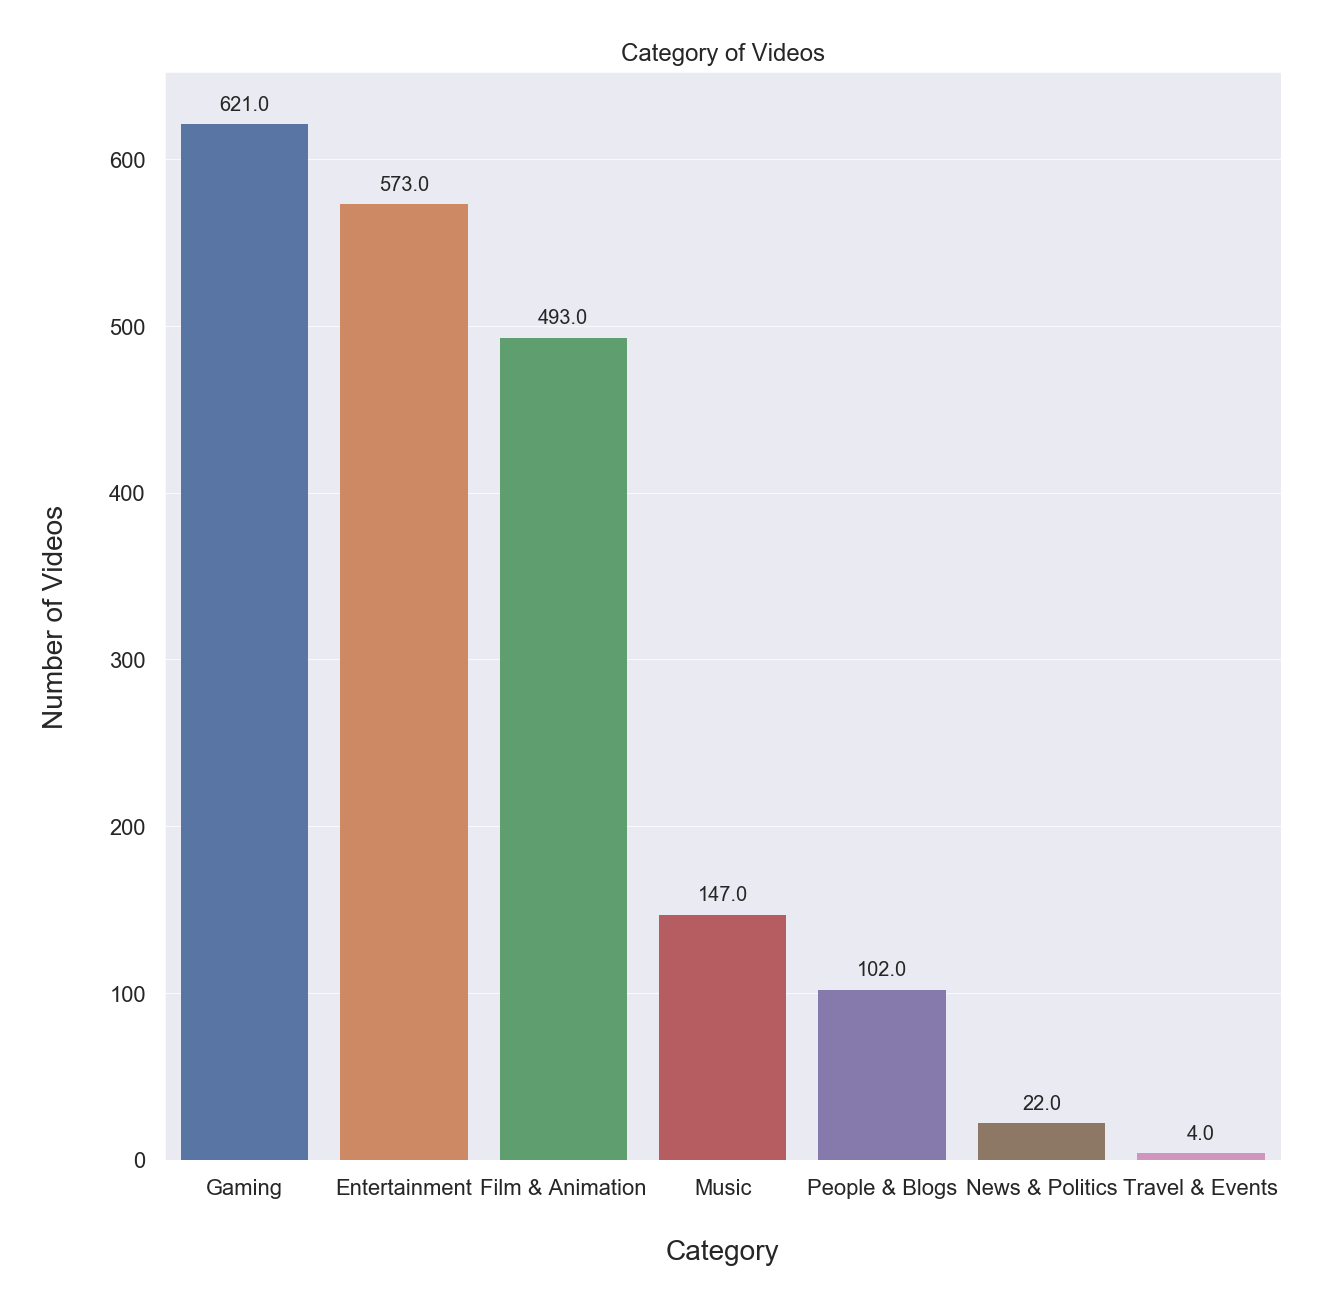

In [47]:
VideoCategory = result['videoCategoryLabel'].value_counts().reset_index()
plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax3 = sns.barplot(x=VideoCategory['index'],y=VideoCategory['videoCategoryLabel'], data=VideoCategory)
plt.ylabel("Number of Videos")
plt.xlabel("Category")
plt.title("Category of Videos")

rects3 = ax3.patches

for rect in rects3:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)



### MOST VIEWED VIDEO CATEGORIES

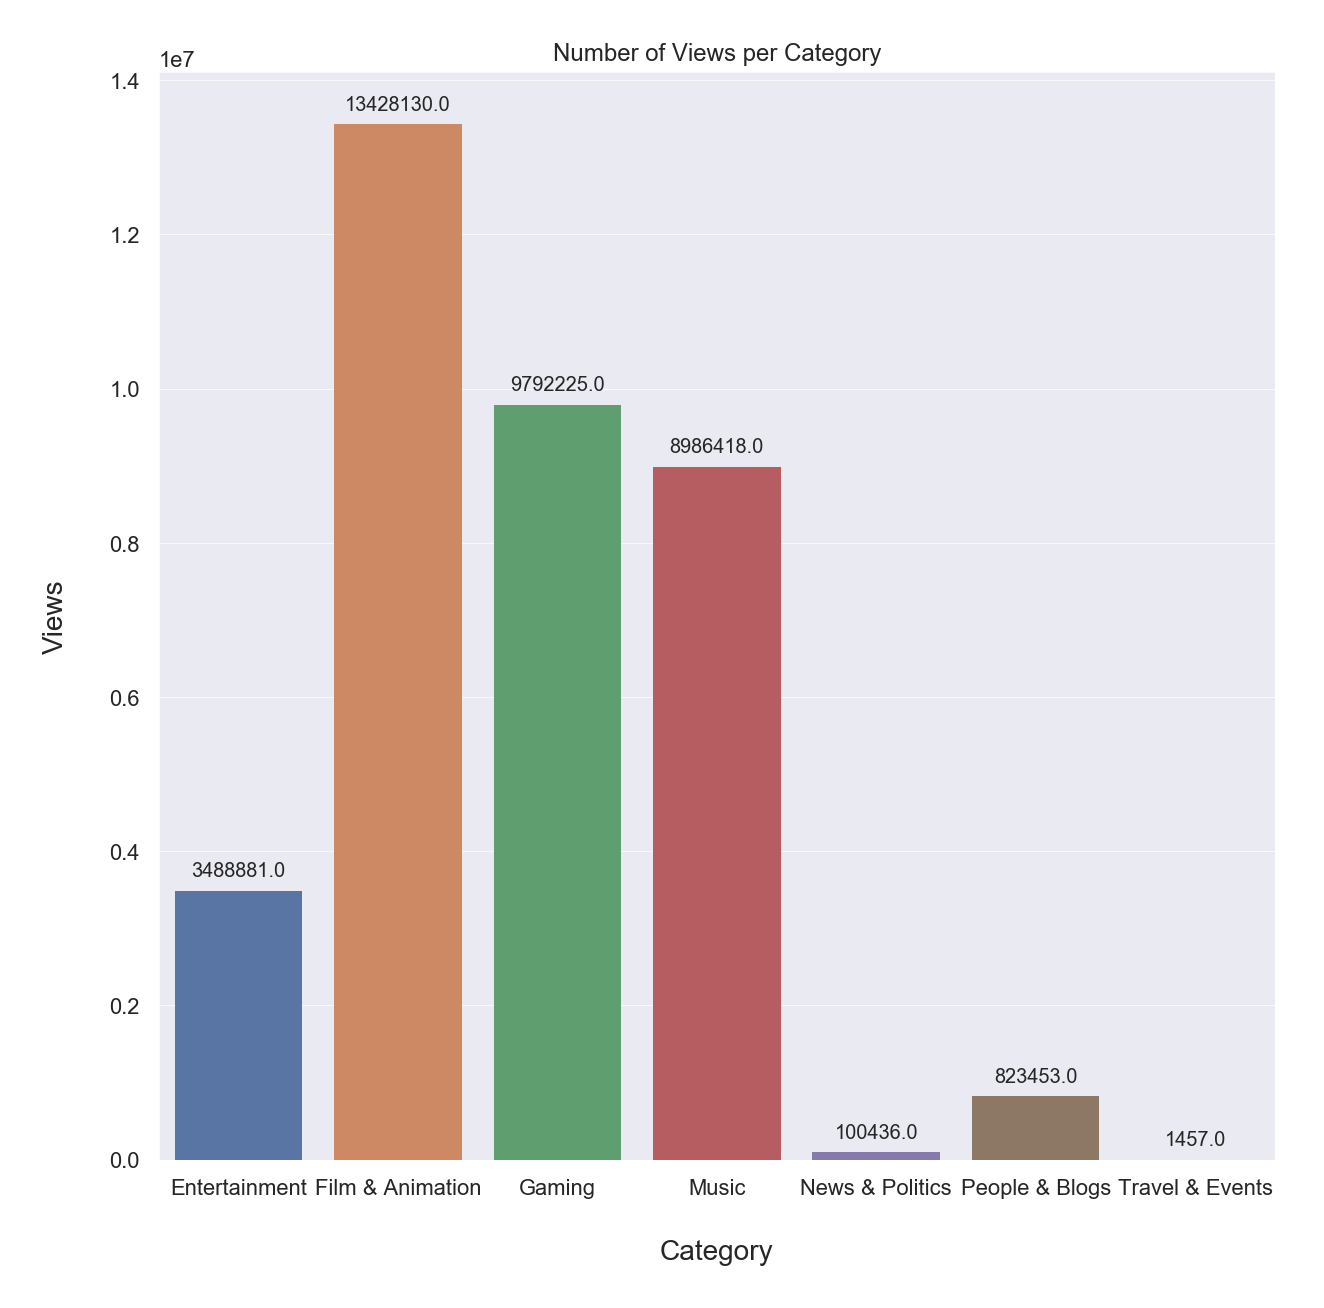

In [48]:
groupbyCat=result.groupby('videoCategoryLabel').sum().reset_index()

plt.figure(figsize=(10,10))
sns.set_style("darkgrid")
ax12 = sns.barplot(y='viewCount', x='videoCategoryLabel', data=groupbyCat)
plt.xlabel("Category")
plt.ylabel("Views")
plt.title("Number of Views per Category")



rects12 = ax12.patches

for rect in rects12:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    
    space = 5
    
    va = 'bottom'
    
    label = '{:.1f}'.format(y_value)
    
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(0, space),
        textcoords='offset points',
        ha = 'center',
        va = va)


### FINDING CORRELATION BETWEEN VIDEO MATRICS - ALL DATA COMBINED

In [157]:
result1 = result[['durationSec','viewCount','likeCount','dislikeCount','commentCount','videoCategoryId']]

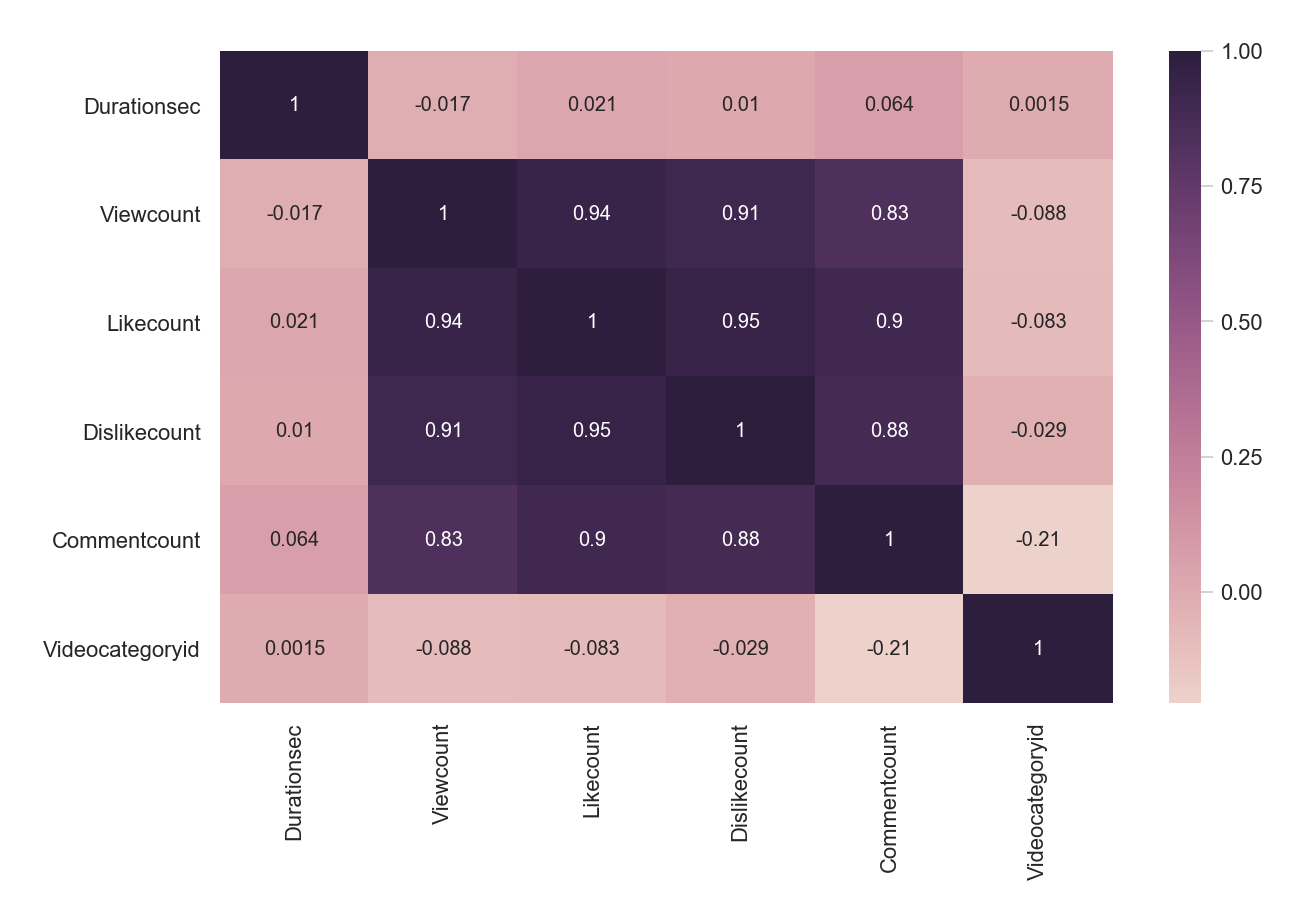

In [158]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(result1.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(result1.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, 
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

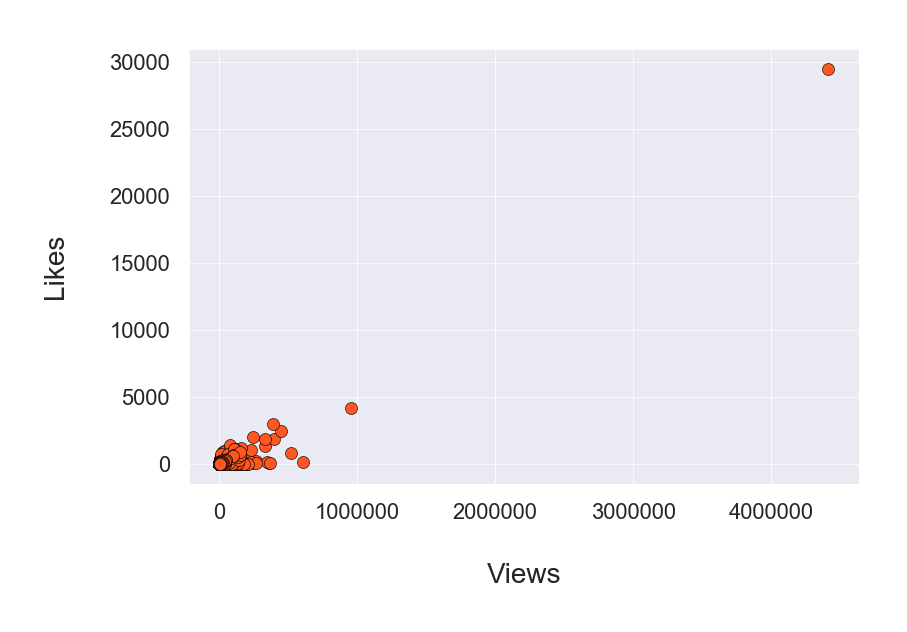

In [159]:
fig, ax4 = plt.subplots()
_ = plt.scatter(x=result['viewCount'], y=result['likeCount'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.3)
_ = ax4.set(xlabel="Views", ylabel="Likes")

### FINDING CORRELATION - KINCIR CINEMA

In [ ]:
fig, ax4 = plt.subplots()
_ = plt.scatter(x=result['viewCount'], y=result['likeCount'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.3)
_ = ax4.set(xlabel="Views", ylabel="Likes")

In [146]:
dfCinema1 = dfCinema[['durationSec','viewCount','likeCount','dislikeCount','commentCount']]

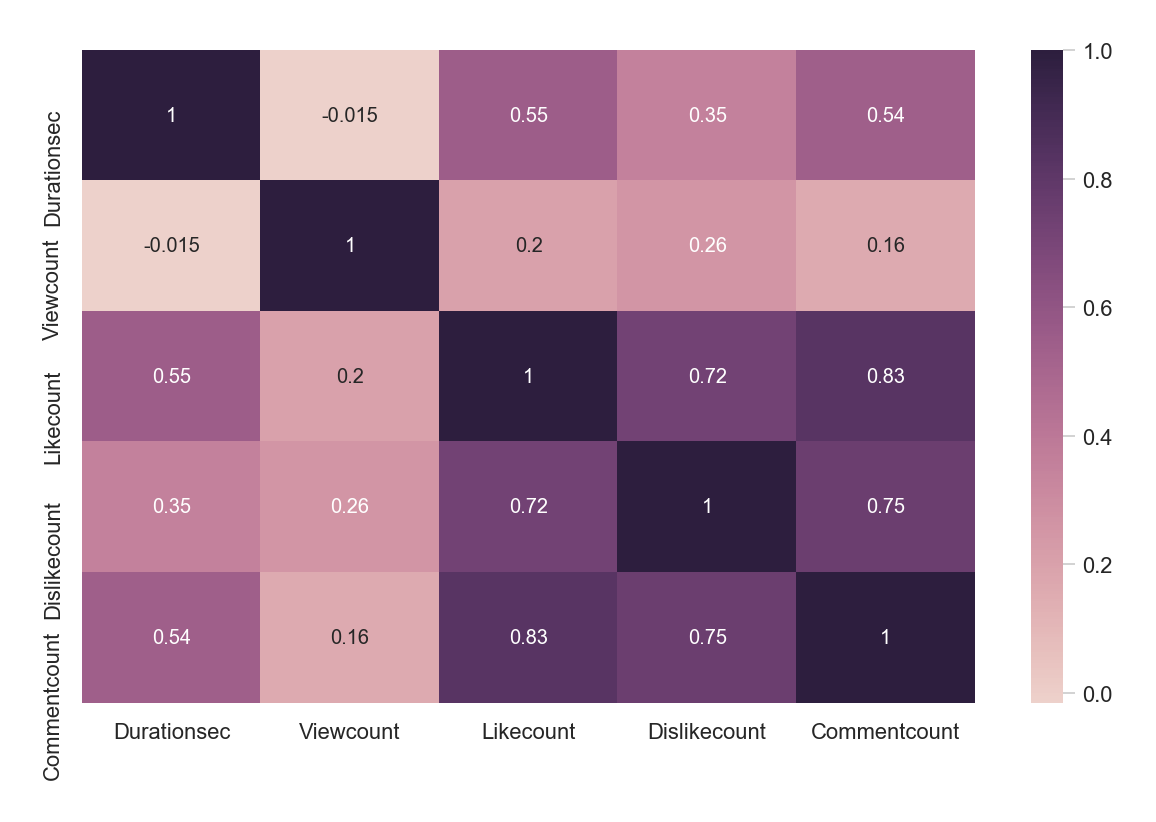

In [147]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(dfCinema1.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(dfCinema1.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, 
                cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

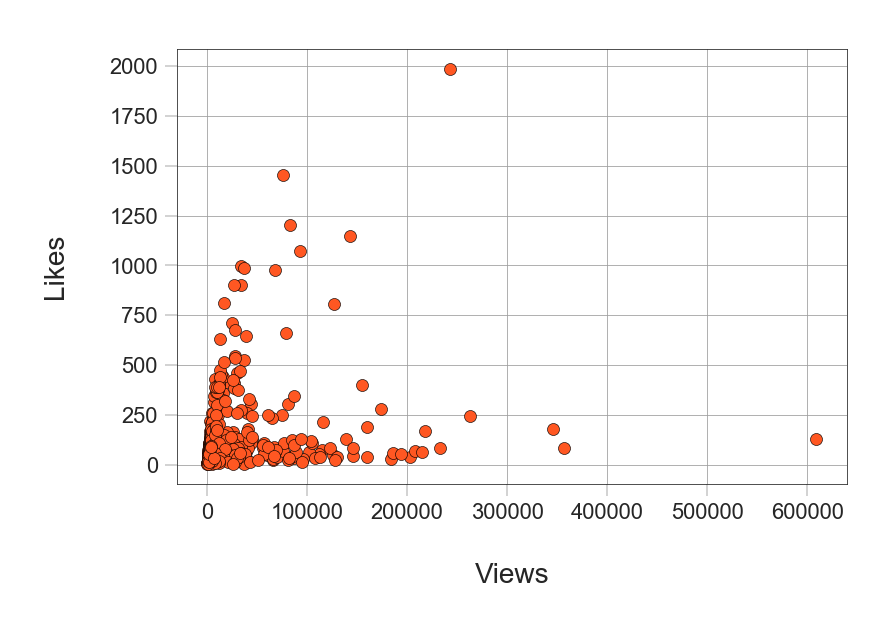

In [42]:
fig, ax1 = plt.subplots()
_ = plt.scatter(x=dfCinema1['viewCount'], y=dfCinema1['likeCount'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.3)
_ = ax1.set(xlabel="Views", ylabel="Likes")

### FINDING CORRELATION - KINCIR PLAYROOM

In [32]:
dfPlayroom1 = dfPlayroom[['durationSec','viewCount','likeCount','dislikeCount','commentCount']]

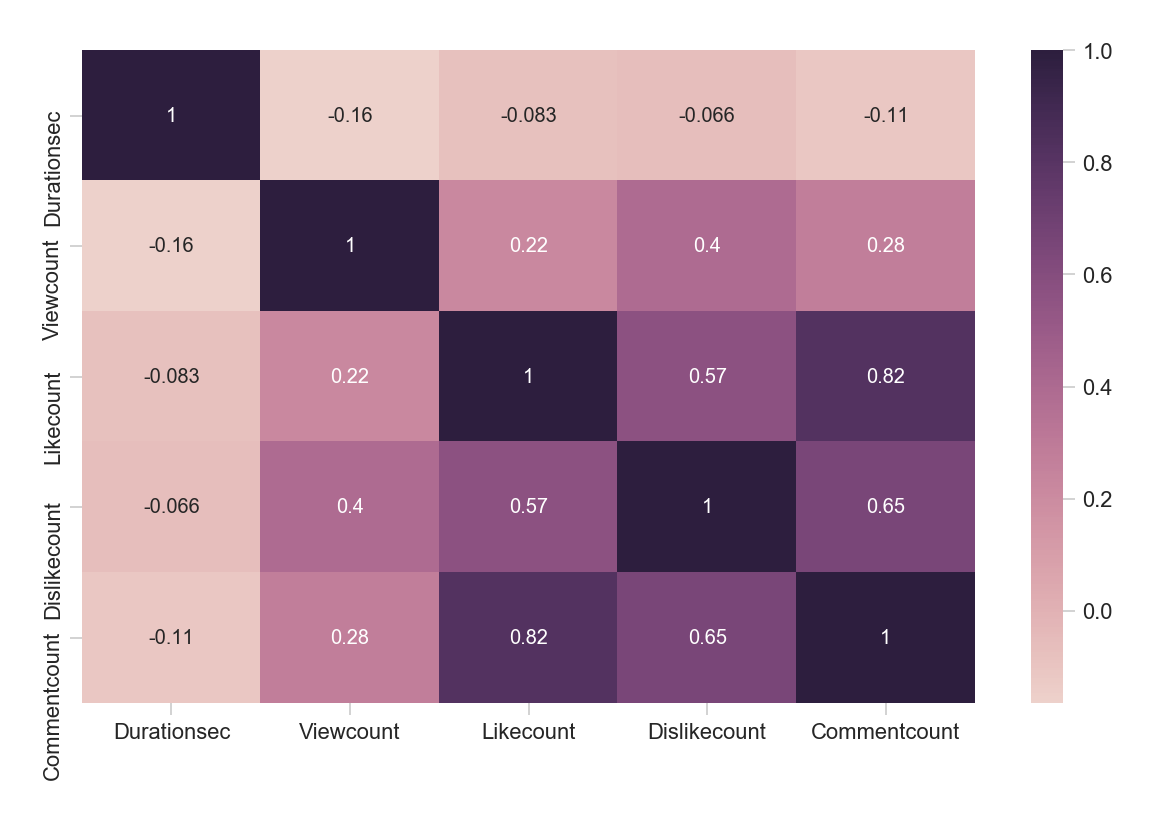

In [33]:
j_labels = [x.replace('_', ' '). title() for x in
            list(dfPlayroom1.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(dfPlayroom1.corr(), annot=True, xticklabels=j_labels, yticklabels=j_labels,
              cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

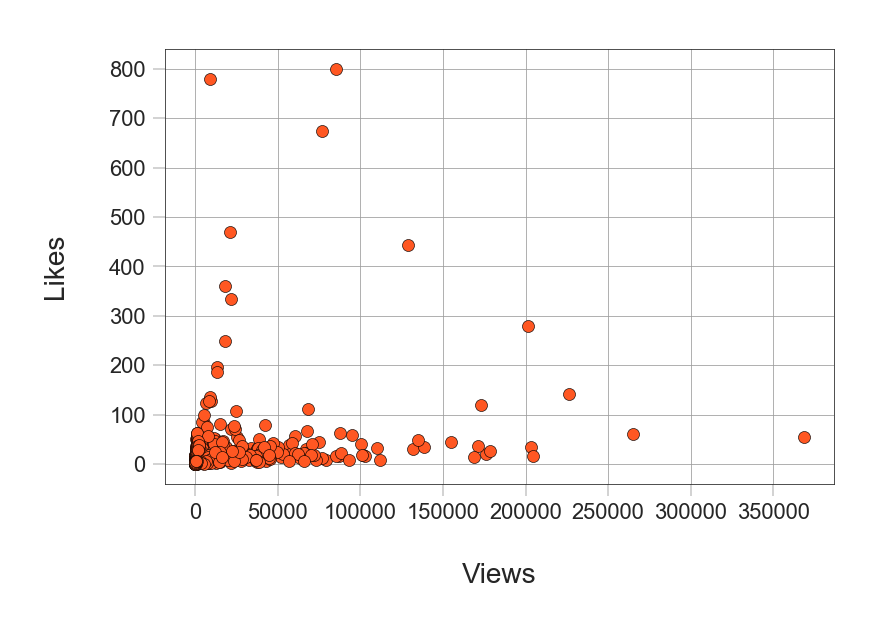

In [41]:
fig, ax2 = plt.subplots()
_ = plt.scatter(x=dfPlayroom1['viewCount'], y=dfPlayroom1['likeCount'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.3)
_ = ax2.set(xlabel="Views", ylabel="Likes")

### FINDING CORRELATION - KINCIR.COM

In [37]:
dfKincir1 = dfKincir[['durationSec','viewCount','likeCount','dislikeCount','commentCount']]

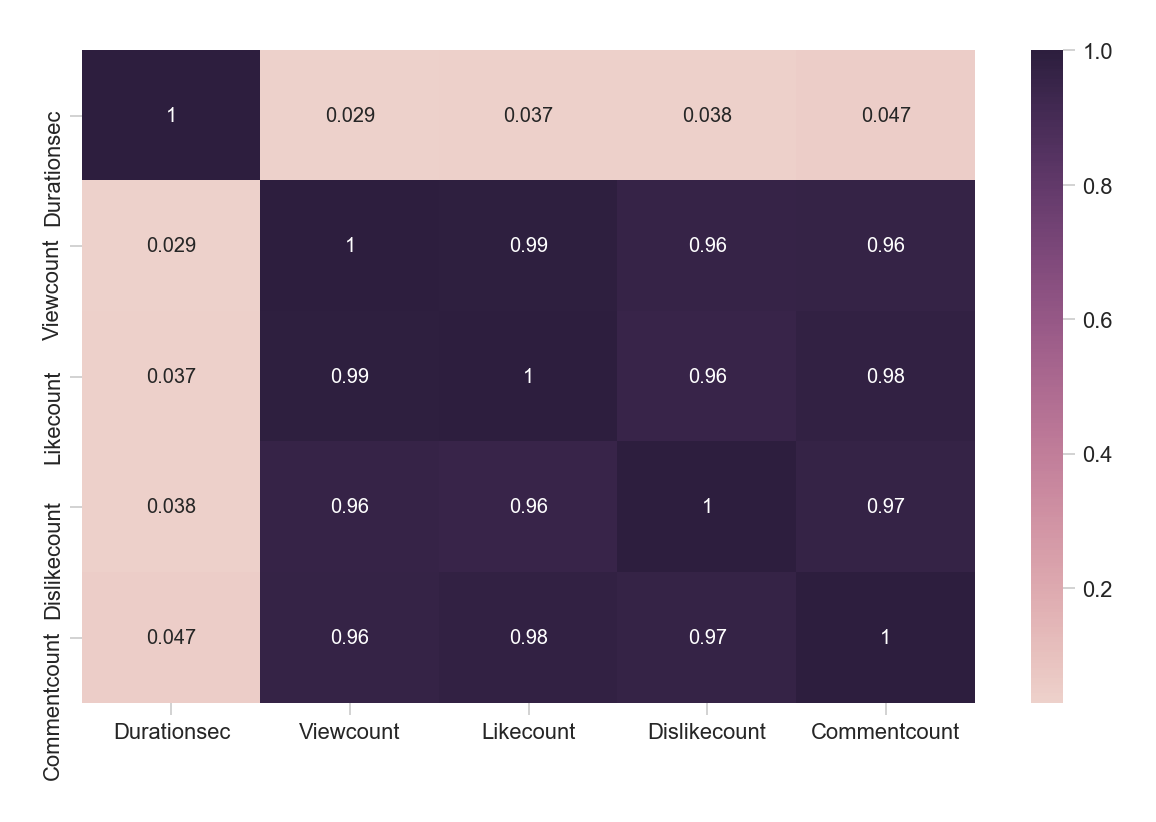

In [38]:
f_labels = [x.replace('_', ' ').title() for x in
            list(dfKincir1.select_dtypes(include=['number','bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(dfKincir1.corr(), annot=True, xticklabels=f_labels, yticklabels=f_labels,
               cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

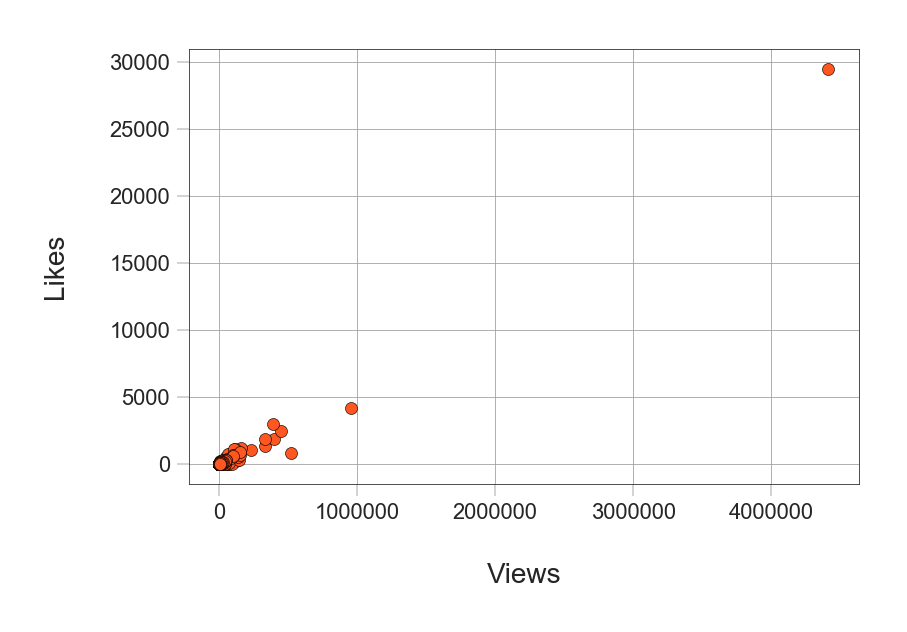

In [43]:
fig, ax3 = plt.subplots()
_ = plt.scatter(x=dfKincir1['viewCount'], y=dfKincir1['likeCount'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.3)
_ = ax3.set(xlabel="Views", ylabel="Likes")

### IS DATA NORMALLY DISTRIBUTED ?

In [65]:
dfCinemaLog = dfCinema
dfPlayroomLog = dfPlayroom
dfKincirLog = dfKincir

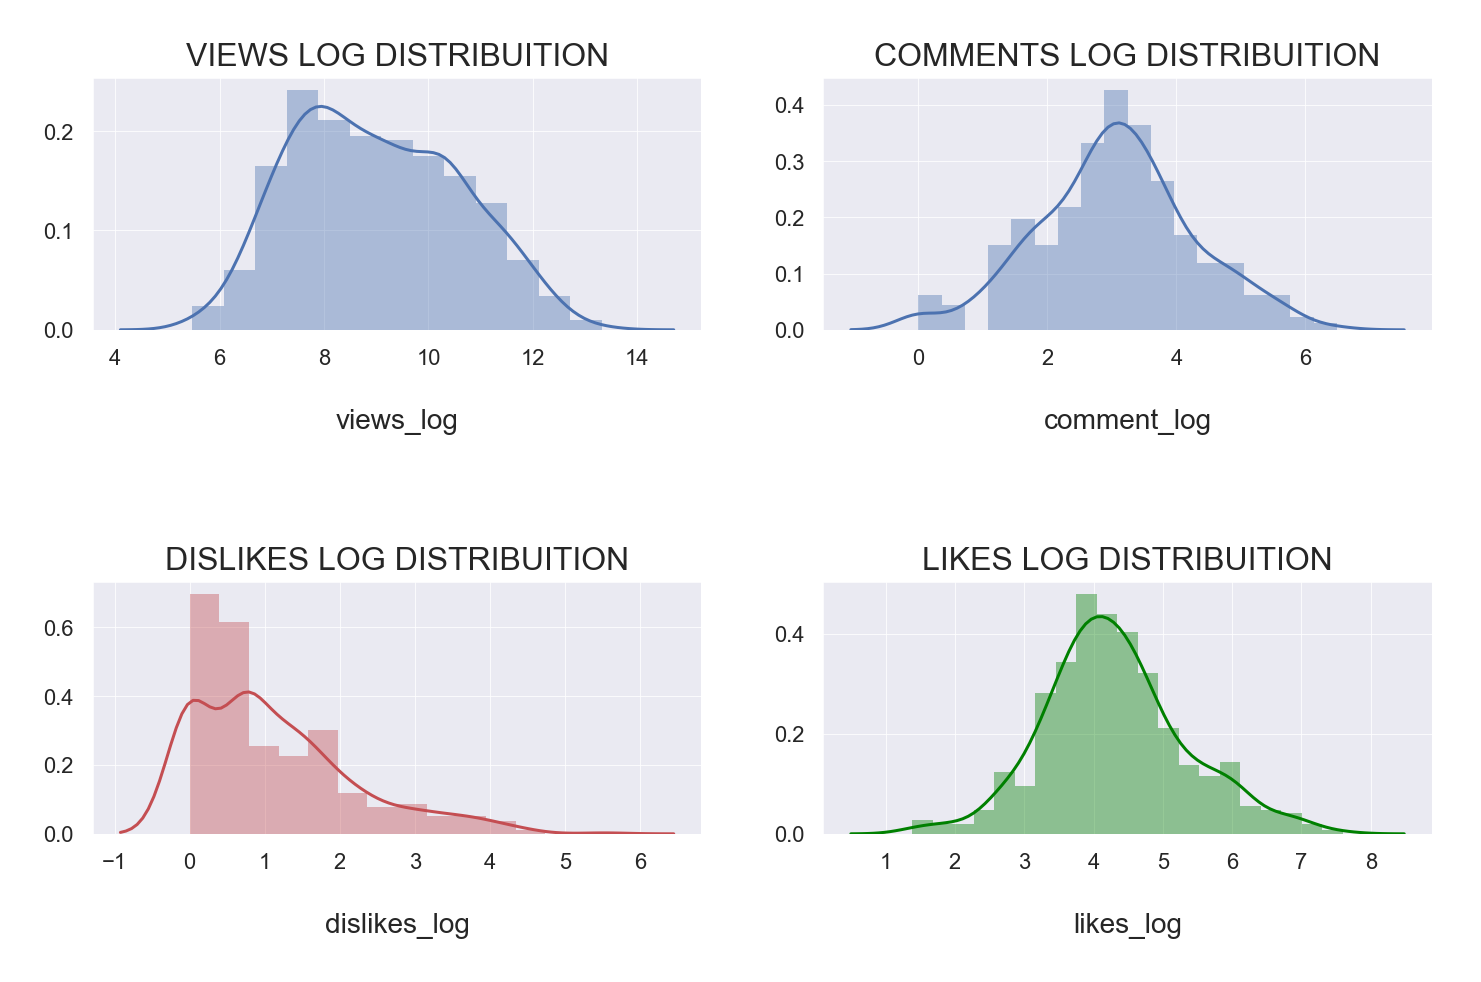

In [66]:
dfCinemaLog['likes_log'] = np.log(df['likeCount'] + 1)
dfCinemaLog['views_log'] = np.log(df['viewCount'] + 1)
dfCinemaLog['dislikes_log'] = np.log(df['dislikeCount'] + 1)
dfCinemaLog['comment_log'] = np.log(df['commentCount'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(dfCinemaLog['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(dfCinemaLog['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(dfCinemaLog['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(dfCinemaLog['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 1,top = 1)

plt.show()

In [ ]:
#KINCIR PLAYROOM

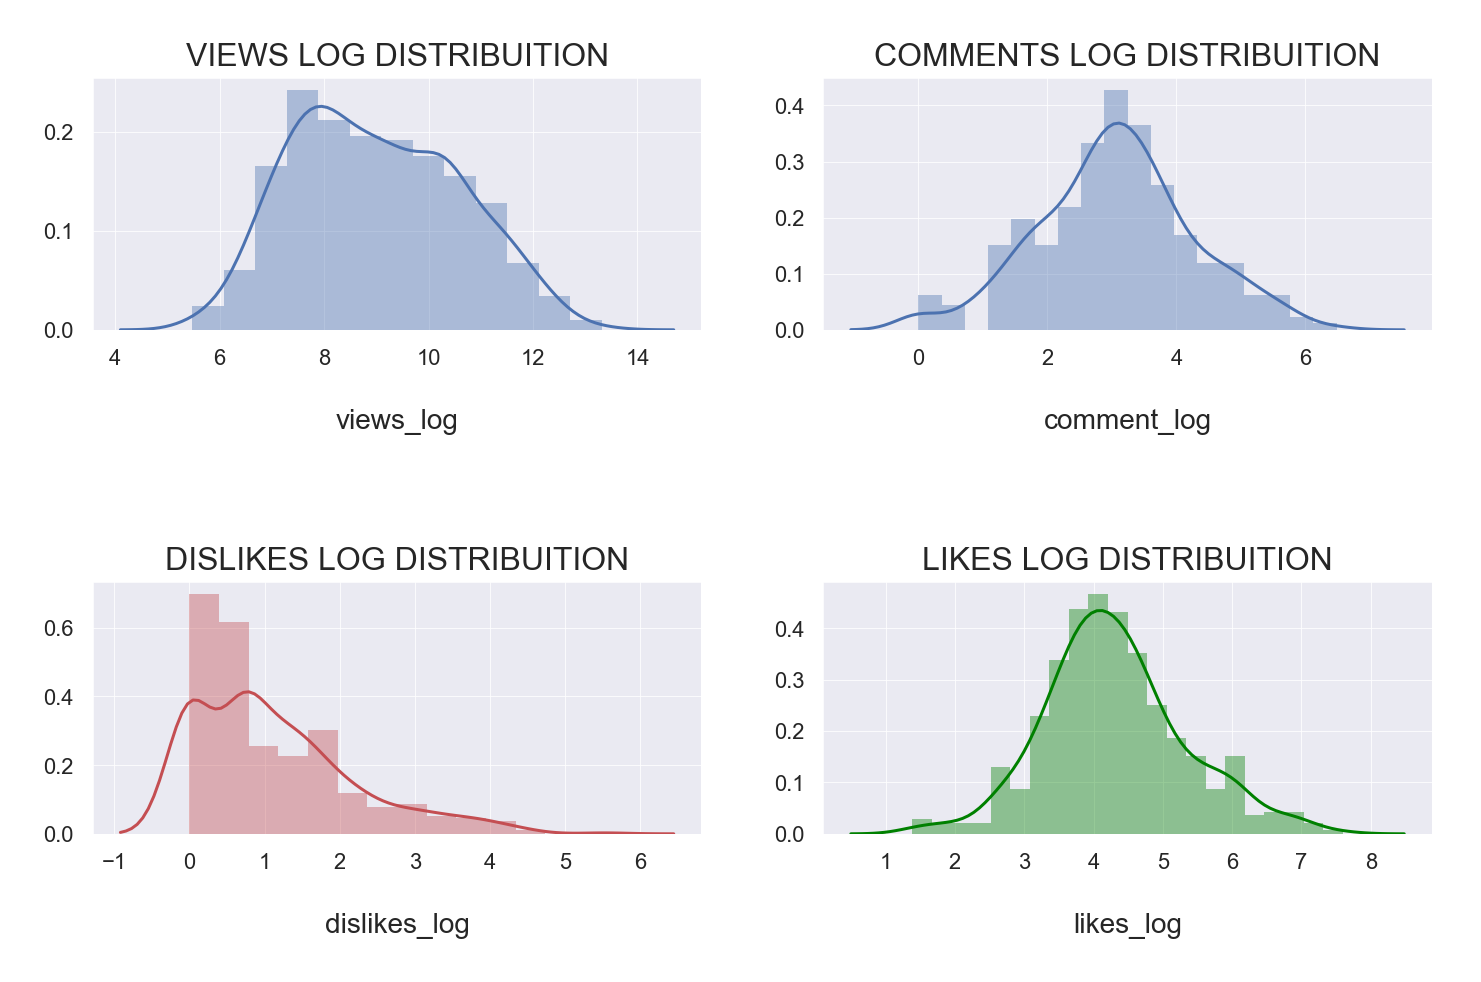

In [69]:
dfPlayroomLog['likes_log'] = np.log(df['likeCount'] + 1)
dfPlayroomLog['views_log'] = np.log(df['viewCount'] + 1)
dfPlayroomLog['dislikes_log'] = np.log(df['dislikeCount'] + 1)
dfPlayroomLog['comment_log'] = np.log(df['commentCount'] + 1)

dfPlayroomLog = dfPlayroomLog.dropna()

plt.figure(figsize = (12,6))

plt.subplot(221)
g12 = sns.distplot(dfPlayroomLog['views_log'])
g12.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g22 = sns.distplot(dfPlayroomLog['likes_log'],color='green')
g22.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g32 = sns.distplot(dfPlayroomLog['dislikes_log'], color='r')
g32.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g42 = sns.distplot(dfPlayroomLog['comment_log'])
g42.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 1,top = 1)

plt.show()

In [ ]:
#KINCIR DOT COM

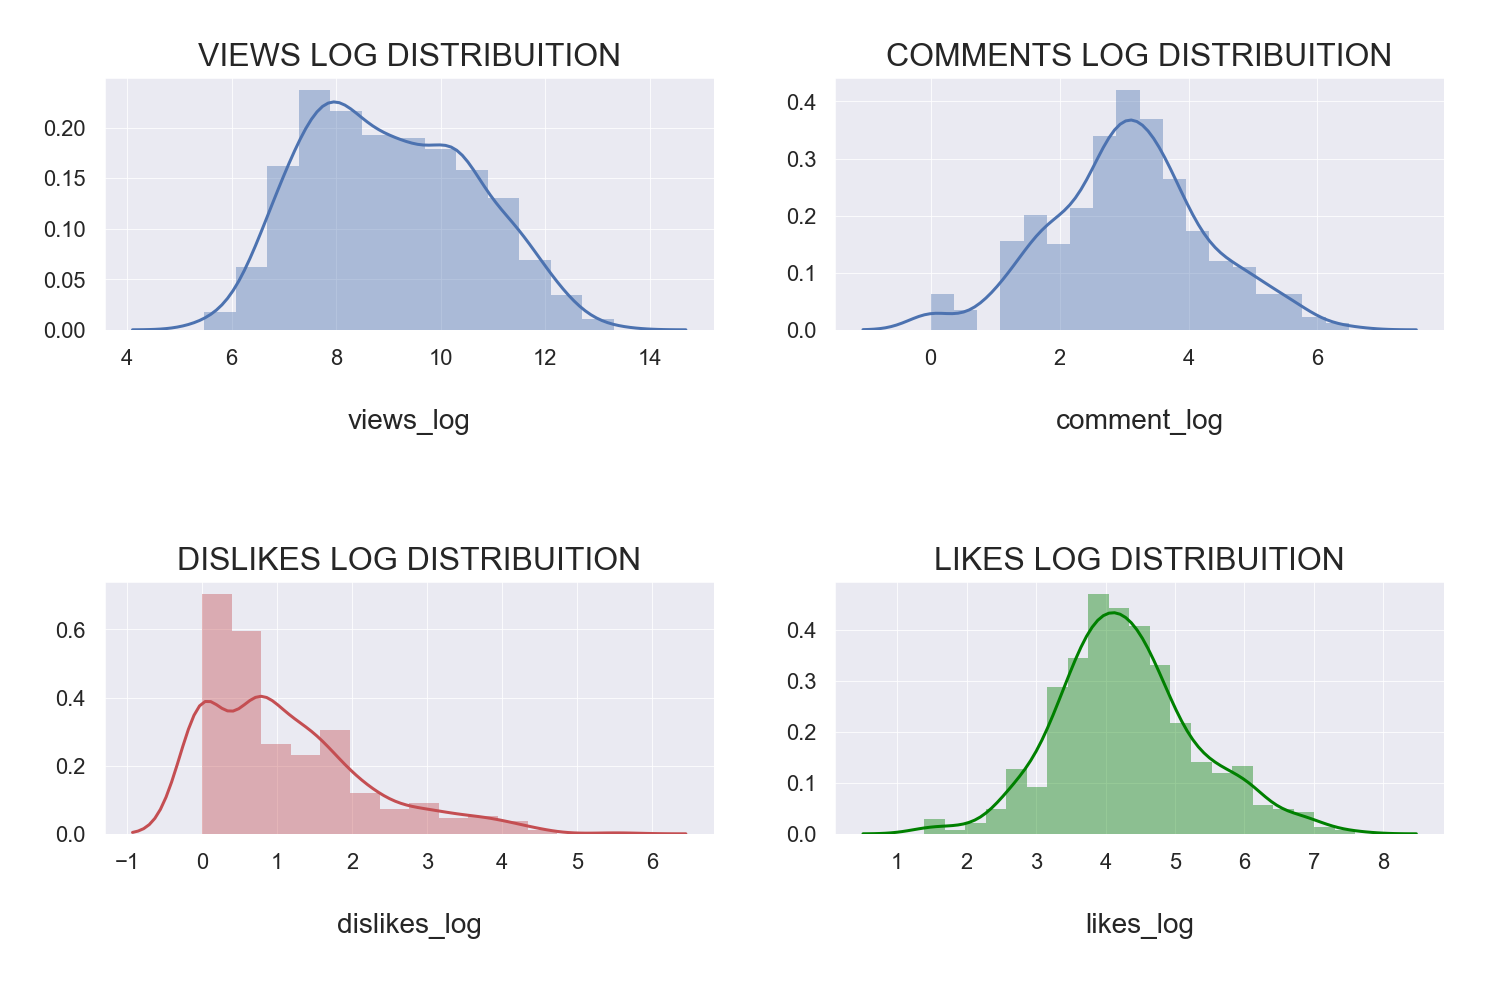

In [70]:
dfKincirLog['likes_log'] = np.log(df['likeCount'] + 1)
dfKincirLog['views_log'] = np.log(df['viewCount'] + 1)
dfKincirLog['dislikes_log'] = np.log(df['dislikeCount'] + 1)
dfKincirLog['comment_log'] = np.log(df['commentCount'] + 1)

dfKincirLog = dfKincirLog.dropna()

plt.figure(figsize = (12,6))

plt.subplot(221)
g13 = sns.distplot(dfKincirLog['views_log'])
g13.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g23 = sns.distplot(dfKincirLog['likes_log'],color='green')
g23.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g33 = sns.distplot(dfKincirLog['dislikes_log'], color='r')
g33.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g43 = sns.distplot(dfKincirLog['comment_log'])
g43.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 1,top = 1)

plt.show()